In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
import warnings

In [3]:
host = "localhost"
user = "root"
passwords = "root"
connection = mysql.connector.connect(
           host=host,
           user=user,
           password=passwords
            )


In [4]:
mycursor = connection.cursor()
database = "create database if not exists Game_Analysis"
mycursor.execute(database)
mycursor.execute("use Game_Analysis")

In [5]:
df1 = pd.read_csv("games.csv")
df2 = pd.read_csv("vgsales.csv")

In [6]:
df1.head()

Unnamed: 0                                    Title  Release Date  \
0           0                               Elden Ring  Feb 25, 2022   
1           1                                    Hades  Dec 10, 2019   
2           2  The Legend of Zelda: Breath of the Wild  Mar 03, 2017   
3           3                                Undertale  Sep 15, 2015   
4           4                            Hollow Knight  Feb 24, 2017   

                                                Team  Rating Times Listed  \
0     ['Bandai Namco Entertainment', 'FromSoftware']     4.5         3.9K   
1                               ['Supergiant Games']     4.3         2.9K   
2  ['Nintendo', 'Nintendo EPD Production Group No...     4.4         4.3K   
3                                 ['tobyfox', '8-4']     4.2         3.5K   
4                                    ['Team Cherry']     4.4           3K   

  Number of Reviews                                             Genres  \
0              3.9K                               ['Adventure', 'RPG']   
1              2.9K           ['Adventure', 'Brawler', 'Indie', 'RPG']   
2              4.3K                               ['Adventure', 'RPG']   
3              3.5K  ['Adventure', 'Indie', 'RPG', 'Turn Based Stra...   
4                3K                 ['Adventure', 'Indie', 'Platform']   

                                             Summary  \
0  Elden Ring is a fantasy, action and open world...   
1  A rogue-lite hack and slash dungeon crawler in...   
2  The Legend of Zelda: Breath of the Wild is the...   
3  A small child falls into the Underground, wher...   
4  A 2D metroidvania with an emphasis on close co...   

                                             Reviews Plays Playing Backlogs  \
0  ["The first playthrough of elden ring is one o...   17K    3.8K     4.6K   
1  ['convinced this is a roguelike for people who...   21K    3.2K     6.3K   
2  ['This game is the game (that is not CS:GO) th...   30K    2.5K       5K   
3  ['soundtrack is tied for #1 with nier automata...   28K     679     4.9K   
4  ["this games worldbuilding is incredible, with...   21K    2.4K     8.3K   

  Wishlist  
0     4.8K  
1     3.6K  
2     2.6K  
3     1.8K  
4     2.3K

In [7]:
df1.tail()

Unnamed: 0                         Title  Release Date  \
1507        1507  Back to the Future: The Game  Dec 22, 2010   
1508        1508             Team Sonic Racing  May 21, 2019   
1509        1509                Dragon's Dogma  May 22, 2012   
1510        1510               Baldur's Gate 3  Oct 06, 2020   
1511        1511      The LEGO Movie Videogame  Feb 04, 2014   

                           Team  Rating Times Listed Number of Reviews  \
1507         ['Telltale Games']     3.2           94                94   
1508   ['Sumo Digital', 'Sega']     2.9          264               264   
1509                 ['Capcom']     3.7          210               210   
1510         ['Larian Studios']     4.1          165               165   
1511  ['WB Games', 'TT Fusion']     2.8          184               184   

                                                 Genres  \
1507                   ['Adventure', 'Point-and-Click']   
1508                               ['Arcade', 'Racing']   
1509                                 ['Brawler', 'RPG']   
1510  ['Adventure', 'RPG', 'Strategy', 'Tactical', '...   
1511                            ['Adventure', 'Puzzle']   

                                                Summary  \
1507  Back to the Future: The Game is one of Telltal...   
1508  Team Sonic Racing combines the best elements o...   
1509  Set in a huge open world, Dragon’s Dogma: Dark...   
1510  An ancient evil has returned to Baldur's Gate,...   
1511  Join Emmet and an unlikely group of resistance...   

                                                Reviews Plays Playing  \
1507  ['Very enjoyable game. The story adds onto the...   763       5   
1508  ['jogo morto mas bom', 'not my cup of tea', "C...  1.5K      49   
1509  ['Underrated.', 'A grandes rasgos, es como un ...  1.1K      45   
1510  ['Bu türe bu oyunla girmeye çalışmak hataydı s...   269      79   
1511  ['Legal', 'Pretty Average Lego Game But It Was...  1.7K      11   

     Backlogs Wishlist  
1507      223       67  
1508      413      107  
1509      487      206  
1510      388      602  
1511      239       73

In [8]:
df1.columns

Index(['Unnamed: 0', 'Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist'],
      dtype='object')

In [9]:
df2.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [10]:
df1 = df1.drop("Unnamed: 0", axis =1)

In [11]:
df1.shape

(1512, 13)

In [12]:
df2.shape

(16598, 11)

In [13]:
df1.head()

Title  Release Date  \
0                               Elden Ring  Feb 25, 2022   
1                                    Hades  Dec 10, 2019   
2  The Legend of Zelda: Breath of the Wild  Mar 03, 2017   
3                                Undertale  Sep 15, 2015   
4                            Hollow Knight  Feb 24, 2017   

                                                Team  Rating Times Listed  \
0     ['Bandai Namco Entertainment', 'FromSoftware']     4.5         3.9K   
1                               ['Supergiant Games']     4.3         2.9K   
2  ['Nintendo', 'Nintendo EPD Production Group No...     4.4         4.3K   
3                                 ['tobyfox', '8-4']     4.2         3.5K   
4                                    ['Team Cherry']     4.4           3K   

  Number of Reviews                                             Genres  \
0              3.9K                               ['Adventure', 'RPG']   
1              2.9K           ['Adventure', 'Brawler', 'Indie', 'RPG']   
2              4.3K                               ['Adventure', 'RPG']   
3              3.5K  ['Adventure', 'Indie', 'RPG', 'Turn Based Stra...   
4                3K                 ['Adventure', 'Indie', 'Platform']   

                                             Summary  \
0  Elden Ring is a fantasy, action and open world...   
1  A rogue-lite hack and slash dungeon crawler in...   
2  The Legend of Zelda: Breath of the Wild is the...   
3  A small child falls into the Underground, wher...   
4  A 2D metroidvania with an emphasis on close co...   

                                             Reviews Plays Playing Backlogs  \
0  ["The first playthrough of elden ring is one o...   17K    3.8K     4.6K   
1  ['convinced this is a roguelike for people who...   21K    3.2K     6.3K   
2  ['This game is the game (that is not CS:GO) th...   30K    2.5K       5K   
3  ['soundtrack is tied for #1 with nier automata...   28K     679     4.9K   
4  ["this games worldbuilding is incredible, with...   21K    2.4K     8.3K   

  Wishlist  
0     4.8K  
1     3.6K  
2     2.6K  
3     1.8K  
4     2.3K

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Release Date       1512 non-null   object 
 2   Team               1511 non-null   object 
 3   Rating             1499 non-null   float64
 4   Times Listed       1512 non-null   object 
 5   Number of Reviews  1512 non-null   object 
 6   Genres             1512 non-null   object 
 7   Summary            1511 non-null   object 
 8   Reviews            1512 non-null   object 
 9   Plays              1512 non-null   object 
 10  Playing            1512 non-null   object 
 11  Backlogs           1512 non-null   object 
 12  Wishlist           1512 non-null   object 
dtypes: float64(1), object(12)
memory usage: 153.7+ KB


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [16]:
df1.describe()

Rating
count  1499.000000
mean      3.719346
std       0.532608
min       0.700000
25%       3.400000
50%       3.800000
75%       4.100000
max       4.800000

In [17]:
df2.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

In [18]:
df1['Rating'] = df1['Rating'].fillna(df1['Rating'].mode()[0])  # Fill with most frequent year
df1['Summary'] = df1['Summary'].fillna(' Summary')
df1['Reviews'] = df1['Reviews'].fillna(' Reviews')
df1['Team'] = df1['Team'].fillna('Team')
df1['Wishlist'] = df1['Wishlist'].fillna('Wishlist')
df1['Release Date'] = df1['Release Date'].fillna('Release Date')
df1['Genres'] = df1['Genres'].fillna('Genres')

In [19]:
df1.isna().sum()

Title                0
Release Date         0
Team                 0
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              0
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
dtype: int64

In [20]:
df1['Rating'] = df1['Rating'].astype(str)
df1['Rating'] = df1['Rating'].str.replace('M', '000', regex=False)
df1['Rating'] = df1['Rating'].str.replace('k', '', regex=False)
df1['Rating'] = df1['Rating'].astype(float)

In [21]:
def Times_Listed(val):
    try:
        if isinstance(val, str):
            val = val.strip().upper()
            if 'M' in val:
                return float(val.replace('M', '')) * 1_000_000
            elif 'K' in val:
                return float(val.replace('K', '')) * 1_000
            else:
                return float(val)
        return float(val)
    except:
        return None  # or np.nan if you prefer

df1['Times Listed'] = df1['Times Listed'].apply(Times_Listed)


In [22]:
df1["Release Date"] = pd.to_datetime(df1["Release Date"], errors='coerce') 

In [23]:
def Number_of_Reviews(val):
    try:
        if isinstance(val, str):
            val = val.strip().upper()
            if 'M' in val:
                return float(val.replace('M', '')) * 1_000_000
            elif 'K' in val:
                return float(val.replace('K', '')) * 1_000
            else:
                return float(val)
        return float(val)
    except:
        return None  # or np.nan if you prefer

df1['Number of Reviews'] = df1['Number of Reviews'].apply(Number_of_Reviews)

In [24]:
def plays(val):
    try:
        if isinstance(val, str):
            val = val.strip().upper()
            if 'M' in val:
                return float(val.replace('M', '')) * 1_000_000
            elif 'K' in val:
                return float(val.replace('K', '')) * 1_000
            else:
                return float(val)
        return float(val)
    except:
        return None  # or np.nan if you prefer

df1['Plays'] = df1['Plays'].apply(plays)

In [25]:
def playing(val):
    try:
        if isinstance(val, str):
            val = val.strip().upper()
            if 'M' in val:
                return float(val.replace('M', '')) * 1_000_000
            elif 'K' in val:
                return float(val.replace('K', '')) * 1_000
            else:
                return float(val)
        return float(val)
    except:
        return None  # or np.nan if you prefer

df1['Playing'] = df1['Playing'].apply(playing)

In [26]:
def Backlog(val):
    try:
        if isinstance(val, str):
            val = val.strip().upper()
            if 'M' in val:
                return float(val.replace('M', '')) * 1_000_000
            elif 'K' in val:
                return float(val.replace('K', '')) * 1_000
            else:
                return float(val)
        return float(val)
    except:
        return None  # or np.nan if you prefer

df1['Backlogs'] = df1['Backlogs'].apply(Backlog)

In [27]:
df1['Wishlist'] = df1['Wishlist'].str.upper()  # Convert all to uppercase (handle 'k' and 'K' uniformly)

def convert_wishlist(value):
    if isinstance(value, str):
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1_000
        else:
            try:
                return float(value)
            except:
                return None
    return value

# Apply conversion
df1['Wishlist'] = df1['Wishlist'].apply(convert_wishlist)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              1512 non-null   object        
 1   Release Date       1509 non-null   datetime64[ns]
 2   Team               1512 non-null   object        
 3   Rating             1512 non-null   float64       
 4   Times Listed       1512 non-null   float64       
 5   Number of Reviews  1512 non-null   float64       
 6   Genres             1512 non-null   object        
 7   Summary            1512 non-null   object        
 8   Reviews            1512 non-null   object        
 9   Plays              1512 non-null   float64       
 10  Playing            1512 non-null   float64       
 11  Backlogs           1512 non-null   float64       
 12  Wishlist           1512 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(5)
memory usage: 153.7

In [29]:
df1['Team'] = df1['Team'].str.replace('[', ' ').str.replace(']', ' ')
df1['Genres'] = df1['Genres'].str.replace('[', '').str.replace(']', '')
df1['Reviews'] = df1['Reviews'].str.replace('[', '').str.replace(']', '')


In [30]:
df1['Team'] = df1['Team'].str.replace('[', ' ').str.replace(']', ' ')

In [31]:
df1.head()

Title Release Date  \
0                               Elden Ring   2022-02-25   
1                                    Hades   2019-12-10   
2  The Legend of Zelda: Breath of the Wild   2017-03-03   
3                                Undertale   2015-09-15   
4                            Hollow Knight   2017-02-24   

                                                Team  Rating  Times Listed  \
0      'Bandai Namco Entertainment', 'FromSoftware'      4.5        3900.0   
1                                'Supergiant Games'      4.3        2900.0   
2   'Nintendo', 'Nintendo EPD Production Group No...     4.4        4300.0   
3                                  'tobyfox', '8-4'      4.2        3500.0   
4                                     'Team Cherry'      4.4        3000.0   

   Number of Reviews                                             Genres  \
0             3900.0                                 'Adventure', 'RPG'   
1             2900.0             'Adventure', 'Brawler', 'Indie', 'RPG'   
2             4300.0                                 'Adventure', 'RPG'   
3             3500.0  'Adventure', 'Indie', 'RPG', 'Turn Based Strat...   
4             3000.0                   'Adventure', 'Indie', 'Platform'   

                                             Summary  \
0  Elden Ring is a fantasy, action and open world...   
1  A rogue-lite hack and slash dungeon crawler in...   
2  The Legend of Zelda: Breath of the Wild is the...   
3  A small child falls into the Underground, wher...   
4  A 2D metroidvania with an emphasis on close co...   

                                             Reviews    Plays  Playing  \
0  "The first playthrough of elden ring is one of...  17000.0   3800.0   
1  'convinced this is a roguelike for people who ...  21000.0   3200.0   
2  'This game is the game (that is not CS:GO) tha...  30000.0   2500.0   
3  'soundtrack is tied for #1 with nier automata....  28000.0    679.0   
4  "this games worldbuilding is incredible, with ...  21000.0   2400.0   

   Backlogs  Wishlist  
0    4600.0    4800.0  
1    6300.0    3600.0  
2    5000.0    2600.0  
3    4900.0    1800.0  
4    8300.0    2300.0

In [32]:
df2.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [33]:
df2['Year'] = df2['Year'].fillna(df2['Year'].mode()[0])  # Fill with most frequent year
df2['Publisher'] = df2['Publisher'].fillna('Unknown Publisher')
df2['Genre'] = df2['Genre'].str.replace('[', ' ').str.replace(']', ' ')

In [34]:
df2.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [36]:
def clean_text(text):
    if isinstance(text, str):
        return text.replace("_", "").replace(",", "").replace(".", "").replace("'", "").replace('"', " ").replace("[]"," ")
    return text
df1_cleaned = df1.applymap(clean_text)
df1_cleaned.to_csv("games_cleaned.csv", index=False)

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/2644566008.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1_cleaned = df1.applymap(clean_text)


In [37]:
def clean_text(text):
    if isinstance(text, str):
        return text.replace("_", "").replace(",", "").replace(".", "").replace("'", "").replace('"', "").replace("[]"," ")
    return text
df2_cleaned = df2.applymap(clean_text)
df2_cleaned.to_csv("vgsales_cleaned.csv", index=False)

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/3090594949.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2_cleaned = df2.applymap(clean_text)


In [93]:
df1 = pd.read_csv("games_cleaned.csv")
df2= pd.read_csv("vgsales_cleaned.csv")

In [94]:
# create table games in mysql
mycursor.execute("""
    CREATE TABLE IF NOT EXISTS games (
        Title varchar(255),
        Release_Date DATETIME,
        Team TEXT,
        Rating FLOAT,
        Times_Listed FLOAT,
        Number_of_Reviews FLOAT,
        Genres TEXT,
        Summary TEXT,  
        Reviews TEXT,    
        Plays FLOAT,
        Playing FLOAT,
        Backlogs FLOAT,
        Wishlist FLOAT
    );
""")


In [95]:
connection.commit()
print("Table created successfully!")

Table created successfully!


In [96]:
# create table vgsales in mysql
mycursor.execute("""
       CREATE TABLE IF NOT EXISTS vgsales (
           `Rank` INT, 
           Name TEXT,
           Platform TEXT,
           Year INT,
           Genre TEXT,
           Publisher TEXT,
           NA_Sales float,
           EU_Sales float,
           JP_Sales float,
           Other_Sales float,
           Global_Sales float
       );
    """)

In [97]:
connection.commit()
print("Table created successfully!")

Table created successfully!


In [98]:
print(df1.columns.tolist())

['Title', 'Release Date', 'Team', 'Rating', 'Times Listed', 'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist']


In [99]:
df1['Release Date'] = pd.to_datetime(df1['Release Date'], errors='coerce')

In [100]:
df1['Release Date'] = pd.to_datetime(df1['Release Date'], errors='coerce') \
                         .dt.strftime('%Y-%m-%d')  

In [101]:
cols_to_clean = ['Number of Reviews', 'Times Listed', 'Rating', 'Plays', 'Playing', 'Backlogs', 'Wishlist']

for col in cols_to_clean:
    df1[col] = (
        df1[col].astype(str)
        .str.replace(',', '', regex=False)
        .str.extract(r'(\d+\.?\d*)')[0]  # Extract numeric value
        .astype(float)
    )

df1['Release Date'] = pd.to_datetime(df1['Release Date'], errors='coerce')
df1['Release Date'] = df1['Release Date'].dt.strftime('%Y-%m-%d')

In [102]:
# games table value insert in mysql

for index, row in df1.iterrows():
    mycursor.execute("""
        INSERT INTO games (
            Title, Release_Date, Team, Rating, Times_Listed, Number_of_Reviews, 
            Genres, Summary, Reviews, Plays, Playing, Backlogs, Wishlist
        ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """, tuple(
        None if pd.isna(value) else value for value in [
            row['Title'], row['Release Date'], row['Team'], row['Rating'], row['Times Listed'],
            row['Number of Reviews'], row['Genres'], row['Summary'], row['Reviews'], row['Plays'],
            row['Playing'], row['Backlogs'], row['Wishlist']
        ]
    ))

connection.commit()
print("Values inserted successfully into games table.")

Values inserted successfully into games table.


In [103]:
print(df2.columns.tolist())

['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


In [104]:
# values insert into vgsales table

for index, row in df2.iterrows():
    try:
        mycursor.execute("""
            INSERT INTO vgsales (
                `Rank`, Name, Platform, Year, Genre, Publisher, 
                NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales
            ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        """, (
            int(row['Rank']) if pd.notna(row['Rank']) else None,
            row['Name'] if pd.notna(row['Name']) else None,
            row['Platform'] if pd.notna(row['Platform']) else None,
            int(row['Year']) if pd.notna(row['Year']) else None,
            row['Genre'] if pd.notna(row['Genre']) else None,
            row['Publisher'] if pd.notna(row['Publisher']) else None,
            float(row['NA_Sales']) if pd.notna(row['NA_Sales']) else None,
            float(row['EU_Sales']) if pd.notna(row['EU_Sales']) else None,
            float(row['JP_Sales']) if pd.notna(row['JP_Sales']) else None,
            float(row['Other_Sales']) if pd.notna(row['Other_Sales']) else None,
            float(row['Global_Sales']) if pd.notna(row['Global_Sales']) else None
        ))
    except Exception as e:
        print(f"Error at row {index}: {e}")
connection.commit()
print("Values inserted successfully into games table.")

Values inserted successfully into games table.


Game Metadata Only

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/3025912355.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rated_games, x='Rating', y='Title', palette='tab10')  # Use correct column name


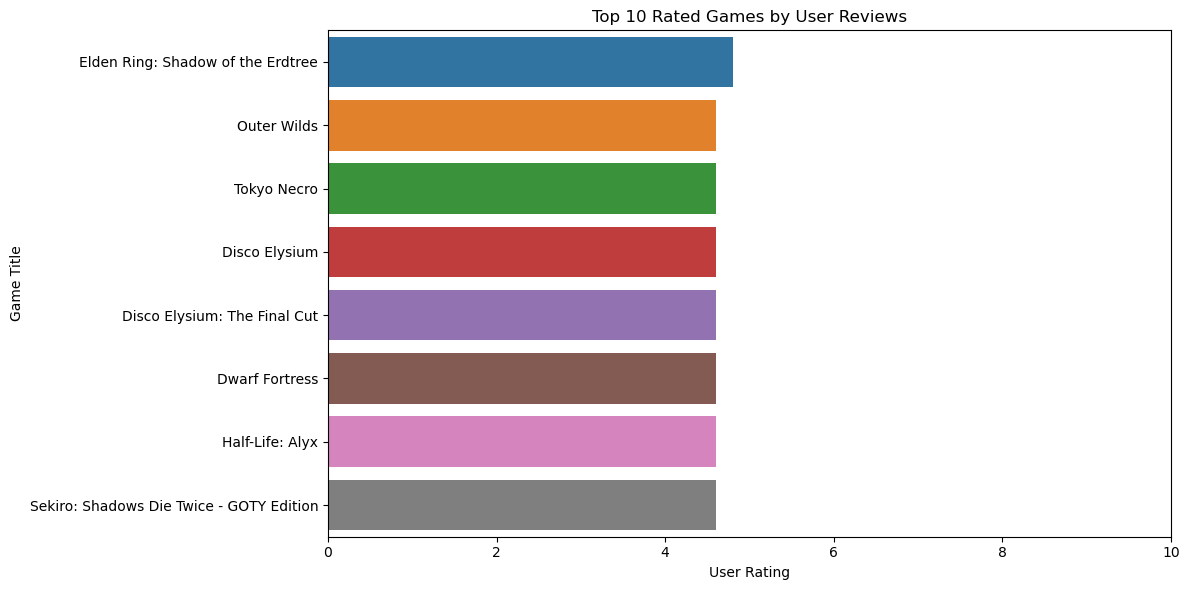

In [105]:
# 1.🌟 What are the top-rated games by user reviews?


top_rated_games = df1.dropna(subset=['Rating']).sort_values(by='Rating', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_rated_games, x='Rating', y='Title', palette='tab10')  # Use correct column name
plt.title('Top 10 Rated Games by User Reviews')
plt.xlabel('User Rating')
plt.ylabel('Game Title')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()


/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/2901632192.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Team', data=top_teams_by_avg_rating, palette='crest')


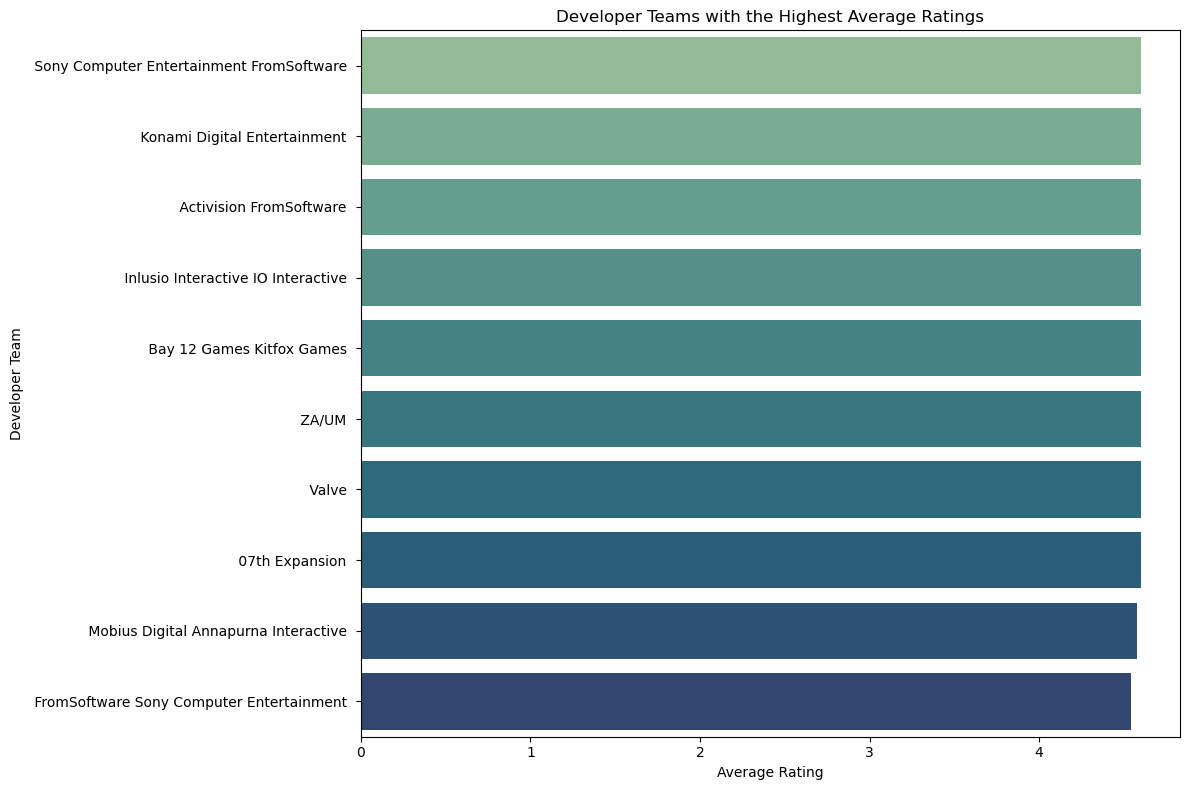

In [106]:
# 2.Which developers (Teams) have the highest average ratings?
df1['Team'] = df1['Team'].str.replace('[', ' ').str.replace(']', ' ')
average_team_ratings = df1.groupby('Team')['Rating'].mean().reset_index()
top_teams_by_avg_rating = average_team_ratings.sort_values(by='Rating', ascending=False).head(10)

# Create a bar chart 
plt.figure(figsize=(12, 8))
sns.barplot(x='Rating', y='Team', data=top_teams_by_avg_rating, palette='crest')
plt.title('Developer Teams with the Highest Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Developer Team')
plt.tight_layout()
plt.show()

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/2910083262.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Set2')
/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/2910083262.py:12: UserWarning: Glyph 127918 (\N{VIDEO GAME}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127918 (\N{VIDEO GAME}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


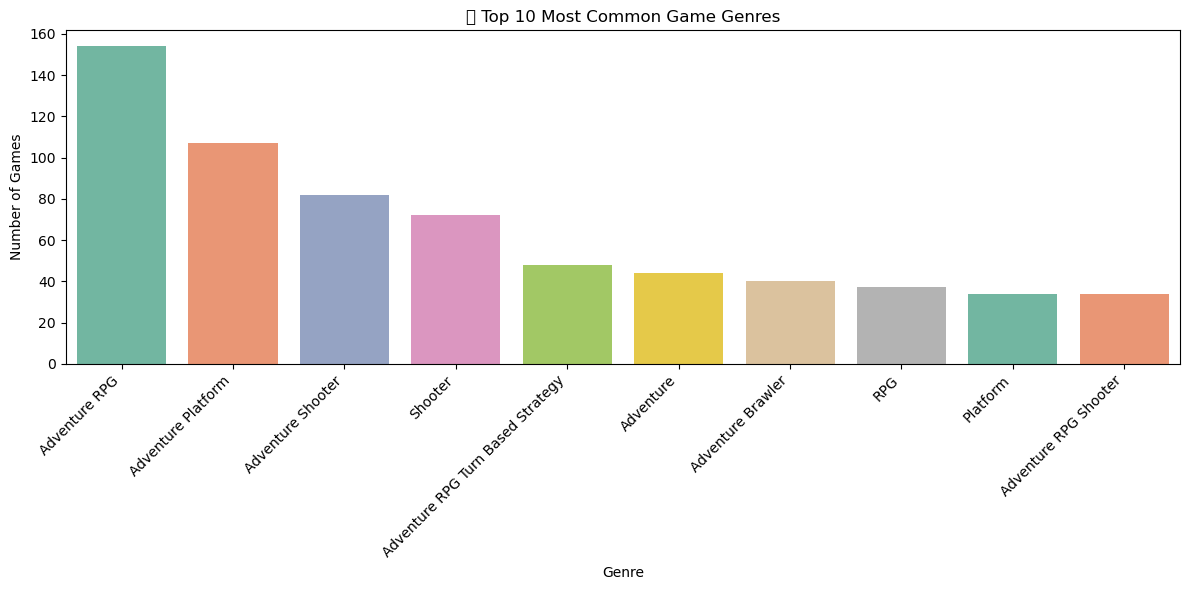

In [107]:
# 3.What are the most common genres in the dataset?
df1['Genres'] = df1['Genres'].str.replace('[', ' ').str.replace(']', ' ')
genre_counts = df1['Genres'].dropna().value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Set2')
plt.title('🎮 Top 10 Most Common Game Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [108]:
print(df1.columns.tolist())

['Title', 'Release Date', 'Team', 'Rating', 'Times Listed', 'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist']


/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/3403327149.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_wishlist, x='Title', y='Wishlist', palette='magma')


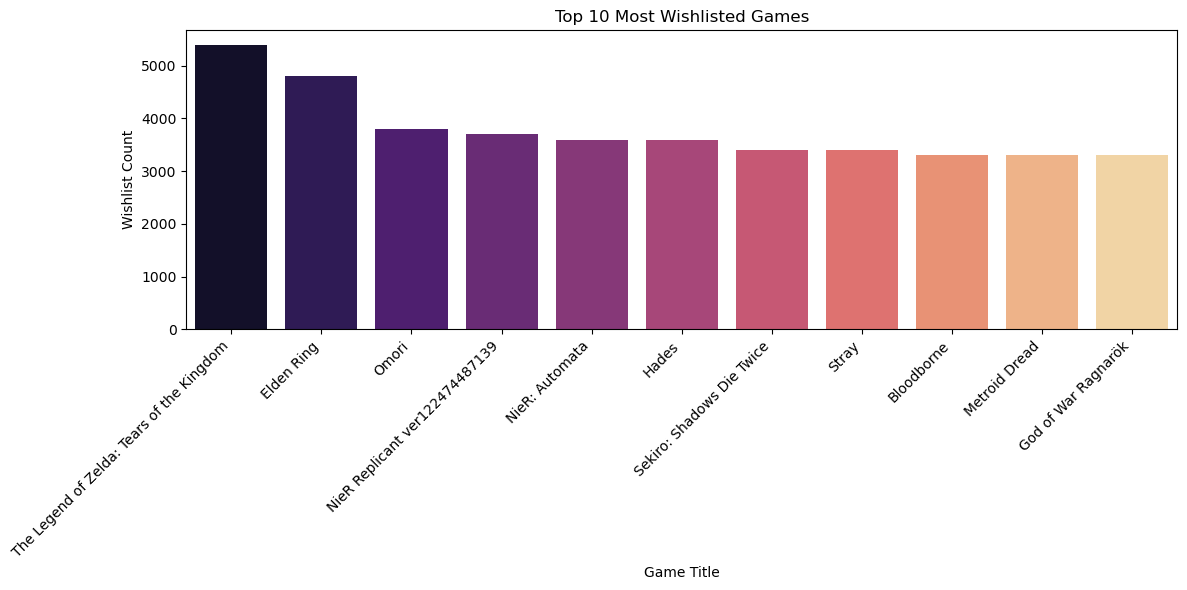

In [109]:
# 4. Which games have the highest backlog compared to wishlist?
# highest wishlist

top_wishlist = df1.sort_values(by='Wishlist', ascending=False).head(30)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=top_wishlist, x='Title', y='Wishlist', palette='magma')
plt.title('Top 10 Most Wishlisted Games')
plt.xlabel('Game Title')
plt.ylabel('Wishlist Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/4217628640.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_backlog_games, x='Title', y='Backlogs', palette='Set2')


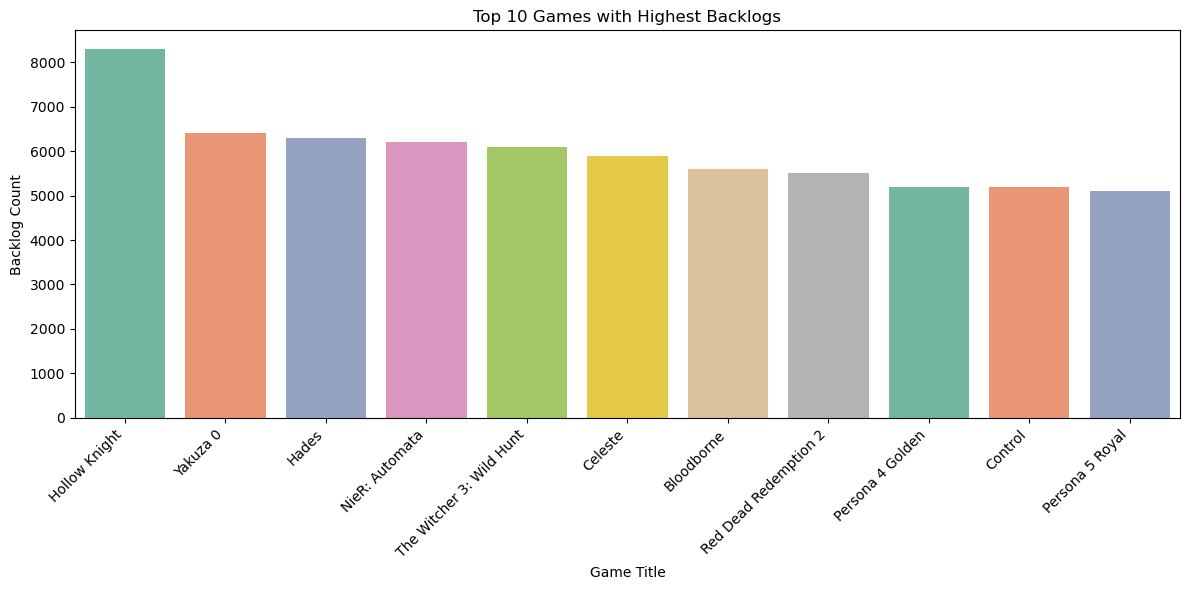

In [110]:
# highest backlogs
df1['Backlogs'] = pd.to_numeric(df1['Backlogs'], errors='coerce')
df1 = df1.dropna(subset=['Backlogs'])
top_backlog_games = df1.sort_values(by='Backlogs', ascending=False).head(30)
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_backlog_games, x='Title', y='Backlogs', palette='Set2')
plt.title('Top 10 Games with Highest Backlogs')
plt.xlabel('Game Title')
plt.ylabel('Backlog Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/2026542462.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_backlog_compared_to_wishlist['Backlog_Wishlist_Ratio'].head(10),


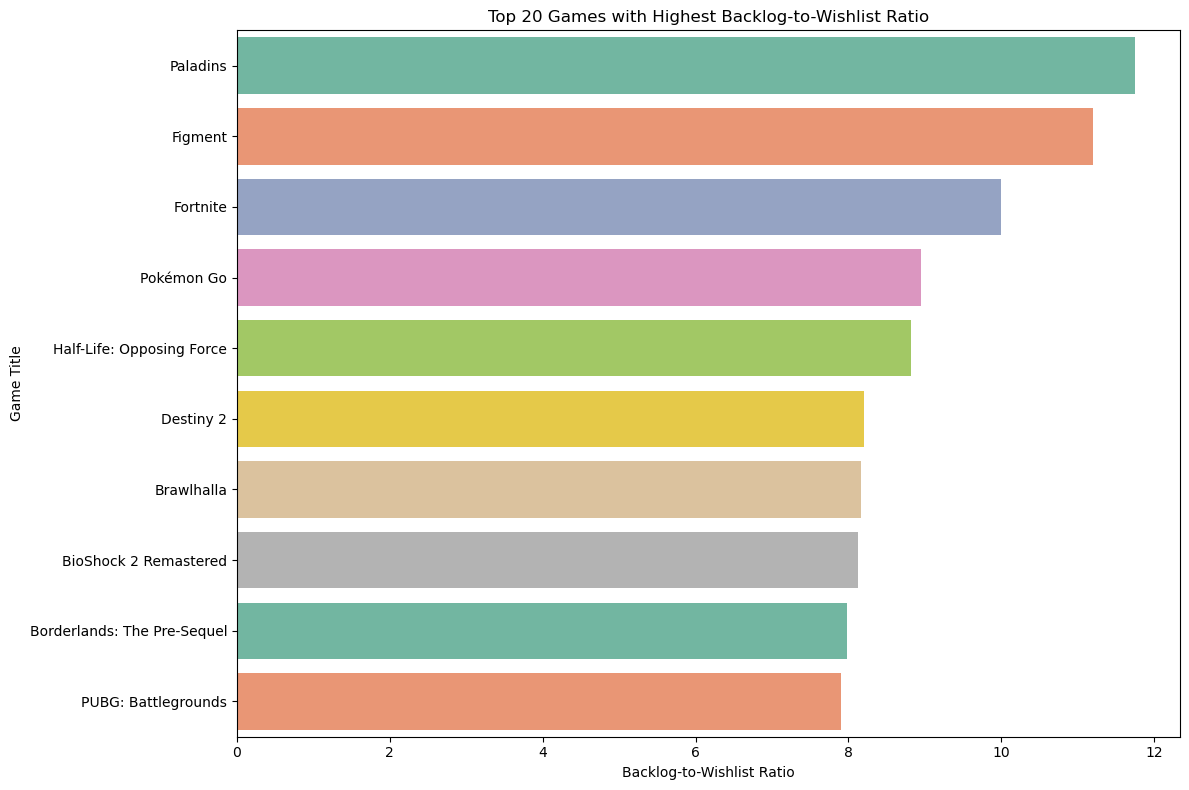

In [111]:

# 4. Which games have the highest backlog compared to wishlist?

df1['Backlogs'] = pd.to_numeric(df1['Backlogs'], errors='coerce')
df1['Wishlist'] = pd.to_numeric(df1['Wishlist'], errors='coerce')
df1.dropna(subset=['Backlogs', 'Wishlist'], inplace=True)
df1['Backlog_Wishlist_Ratio'] = df1['Backlogs'] / (df1['Wishlist'] + 1e-6) # Add a small number to avoid division by zero
top_backlog_compared_to_wishlist = df1.sort_values(by='Backlog_Wishlist_Ratio', ascending=False)
# Create a bar chart of the top 20 games by Backlog_Wishlist_Ratio
plt.figure(figsize=(12, 8))
sns.barplot(x=top_backlog_compared_to_wishlist['Backlog_Wishlist_Ratio'].head(10),
            y=top_backlog_compared_to_wishlist['Title'].head(10),
            palette='Set2')
plt.title('Top 20 Games with Highest Backlog-to-Wishlist Ratio')
plt.xlabel('Backlog-to-Wishlist Ratio')
plt.ylabel('Game Title')
plt.tight_layout()
plt.show()


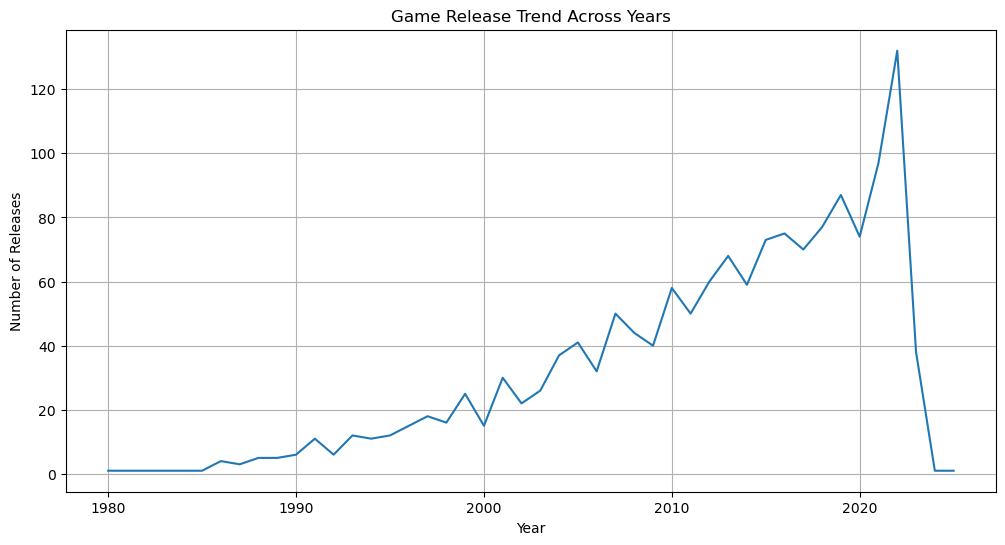

In [112]:
# 5. What is the game release trend across years?

# Create a line chart of game releases across years
df1['Release Date'] = pd.to_datetime(df1['Release Date'], errors='coerce')
df1.dropna(subset=['Release Date'], inplace=True)
df1['Release_Year'] = df1['Release Date'].dt.year
# Count the number of game releases per year
release_counts = df1['Release_Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=release_counts.index, y=release_counts.values)
plt.title('Game Release Trend Across Years')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()

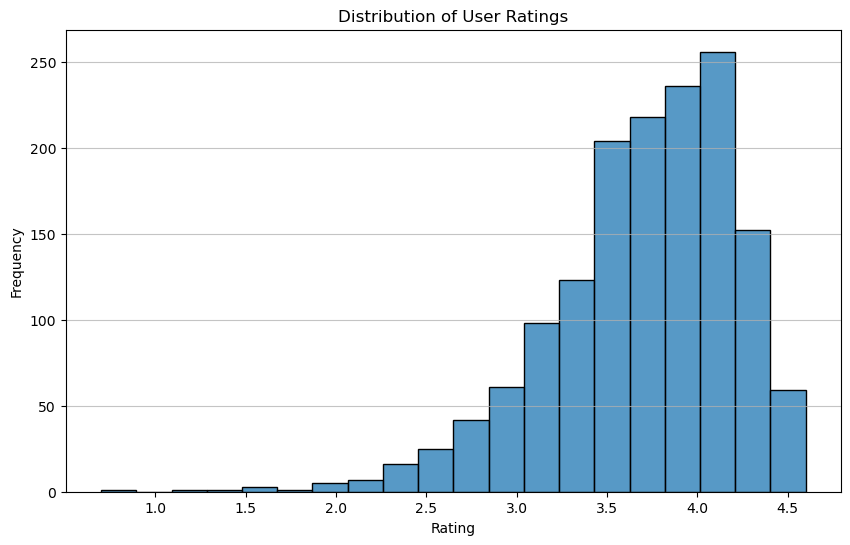

In [113]:
# 6. What is the distribution of user ratings?
#df1.dropna(subset=['Rating'], inplace=True)

# Create a histogram of user ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Rating', bins=20) # kde=True adds a density curve (line plot)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/3791490120.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Wishlist', y='Title', data=top_wishlisted_games, palette='Set2')


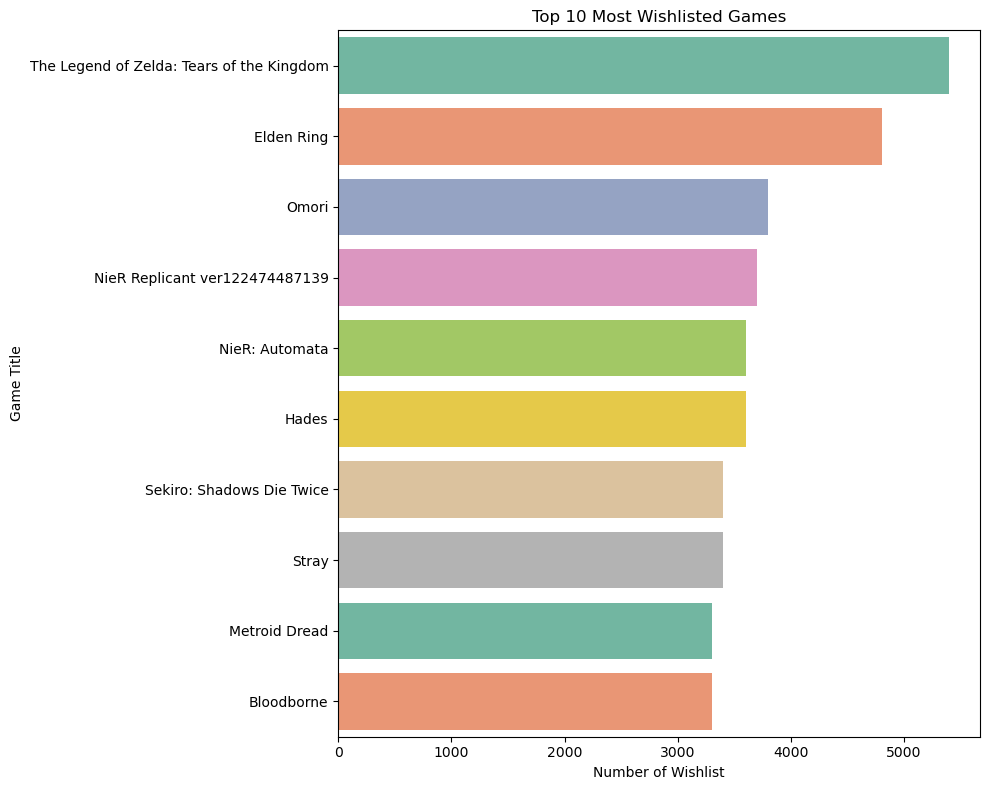

In [114]:
# 7. What are the top 10 most wishlisted games?
df1['Wishlist'] = pd.to_numeric(df1['Wishlist'], errors='coerce')
# Sort by 'Wishlist' to find the top 10 most wishlisted games
top_wishlisted_games = df1.sort_values(by='Wishlist', ascending=False).head(25)

plt.figure(figsize=(10, 8))
sns.barplot(x='Wishlist', y='Title', data=top_wishlisted_games, palette='Set2')
plt.title('Top 10 Most Wishlisted Games')
plt.xlabel('Number of Wishlist')
plt.ylabel('Game Title')
plt.tight_layout()
plt.show()




/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/282738527.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_genre_plays.head(20).index, y=average_genre_plays.head(20).values, palette='Set2')


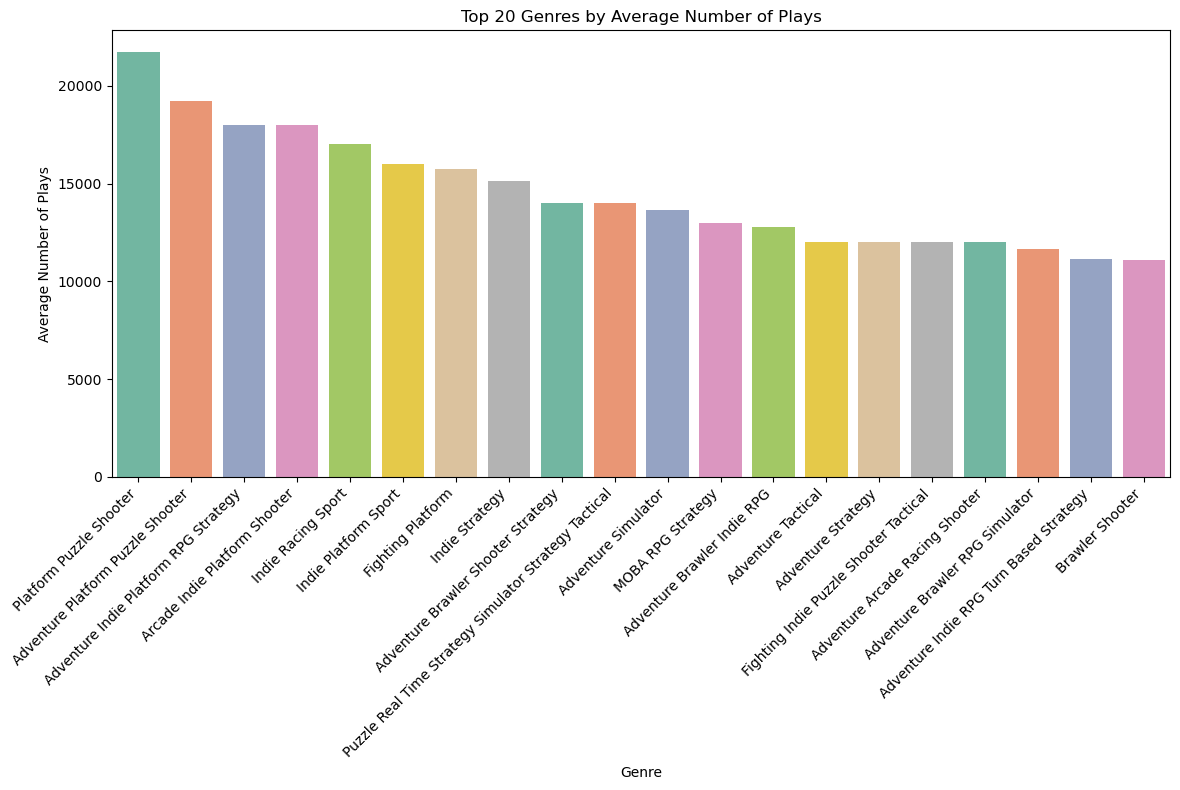

In [115]:
# 8. What’s the average number of plays per genre?
df1['Genres'] = df1['Genres'].str.replace('[', ' ').str.replace(']', ' ')
genre_plays = df1[['Genres', 'Plays']].copy()
genre_plays['Genres'] = genre_plays['Genres'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
genre_plays_exploded = genre_plays.explode('Genres')
genre_plays_exploded['Plays'] = pd.to_numeric(genre_plays_exploded['Plays'], errors='coerce')
genre_plays_exploded.dropna(subset=['Plays'], inplace=True)
average_genre_plays = genre_plays_exploded.groupby('Genres')['Plays'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=average_genre_plays.head(20).index, y=average_genre_plays.head(20).values, palette='Set2')
plt.title('Top 20 Genres by Average Number of Plays')
plt.xlabel('Genre')
plt.ylabel('Average Number of Plays')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1859098090.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


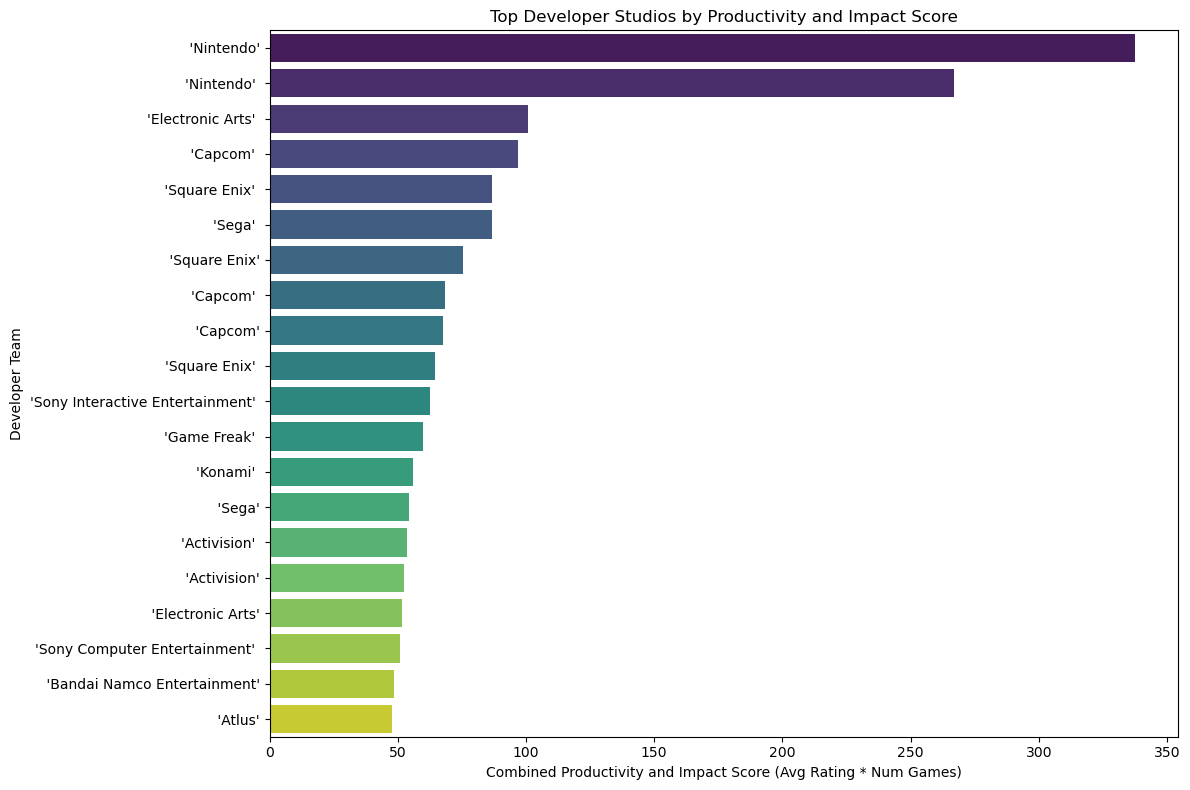

In [116]:
# 9.Which developer studios are the most productive and impactful?

team_analysis = df1_exploded_teams.groupby('Team').agg(
    average_rating=('Rating', 'mean'),
    number_of_games=('Title', 'nunique') # Use unique count of titles as a measure of productivity
).reset_index()
team_analysis = team_analysis[team_analysis['number_of_games'] >= 5] # Example: only include teams with at least 5 games
team_analysis['Productivity_Impact_Score'] = team_analysis['average_rating'] * team_analysis['number_of_games']
top_studios_by_impact = team_analysis.sort_values(by='Productivity_Impact_Score', ascending=False).head(20) # Adjust head() for the number of studios to show
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_studios_by_impact,
    x='Productivity_Impact_Score',
    y='Team',
    palette='viridis'
)
plt.title('Top Developer Studios by Productivity and Impact Score')
plt.xlabel('Combined Productivity and Impact Score (Avg Rating * Num Games)')
plt.ylabel('Developer Team')
plt.tight_layout()
plt.show()

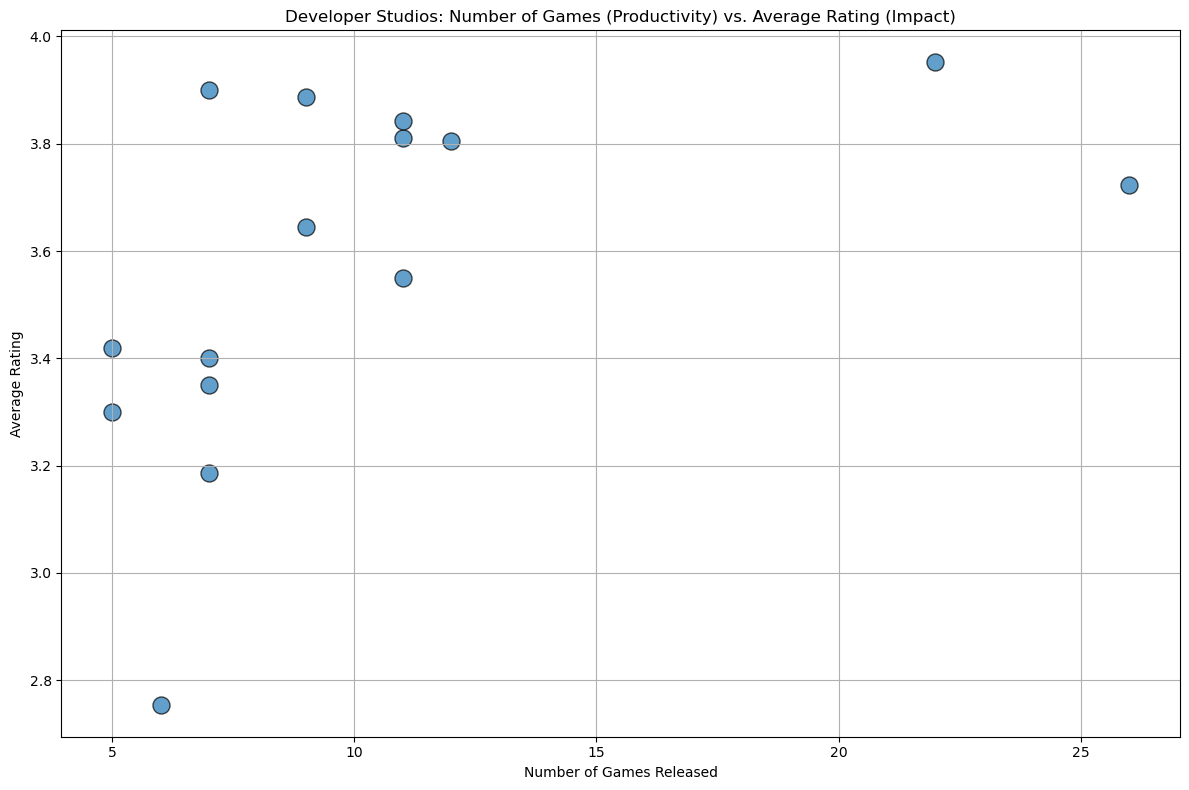

In [117]:
# 9.Which developer studios are the most productive and impactful?

df1['Team'] = df1['Team'].astype(str)

teams = df1['Team'].str.replace('[', '').str.replace(']', '').str.split(', ')
df1_exploded_teams = df1.copy()
df1_exploded_teams['Team'] = teams
df1_exploded_teams = df1_exploded_teams.explode('Team').dropna(subset=['Team']) # Drop rows where team is NaN after explode
df1_exploded_teams['Rating'] = pd.to_numeric(df1_exploded_teams['Rating'], errors='coerce')
df1_exploded_teams.dropna(subset=['Rating'], inplace=True)
team_analysis = df1_exploded_teams.groupby('Team').agg(
    average_rating=('Rating', 'mean'),
    number_of_games=('Title', 'nunique') # Use unique count of titles as a measure of productivity
).reset_index()
team_analysis = team_analysis[team_analysis['number_of_games'] >= 5] # Example: only include teams with at least 5 games

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=team_analysis,
    x='number_of_games',
    y='average_rating',
    s=150, # Adjust marker size
    alpha=0.7, # Adjust transparency
    edgecolor='black'
)

# Add titles and labels
plt.title('Developer Studios: Number of Games (Productivity) vs. Average Rating (Impact)')
plt.xlabel('Number of Games Released')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

Sales Data Only

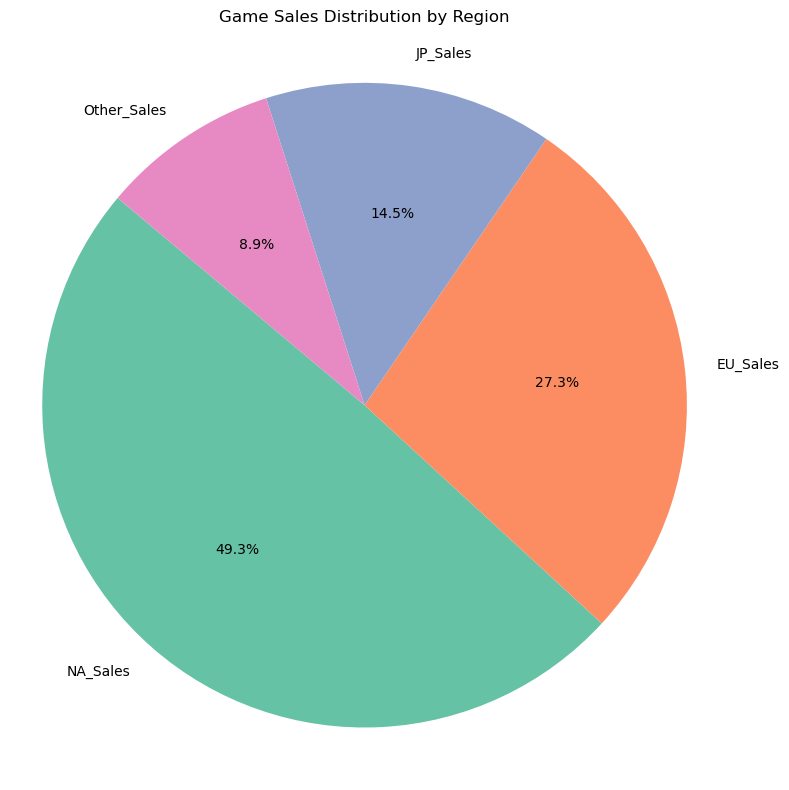

In [118]:

# 10.Which region generates the most game sales?

region_sales = df2[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    region_sales,
    labels=region_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set2', len(region_sales))
)
plt.title('Game Sales Distribution by Region')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/2179651121.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_sales.head(10).index, y=platform_sales.head(10).values, palette='magma')


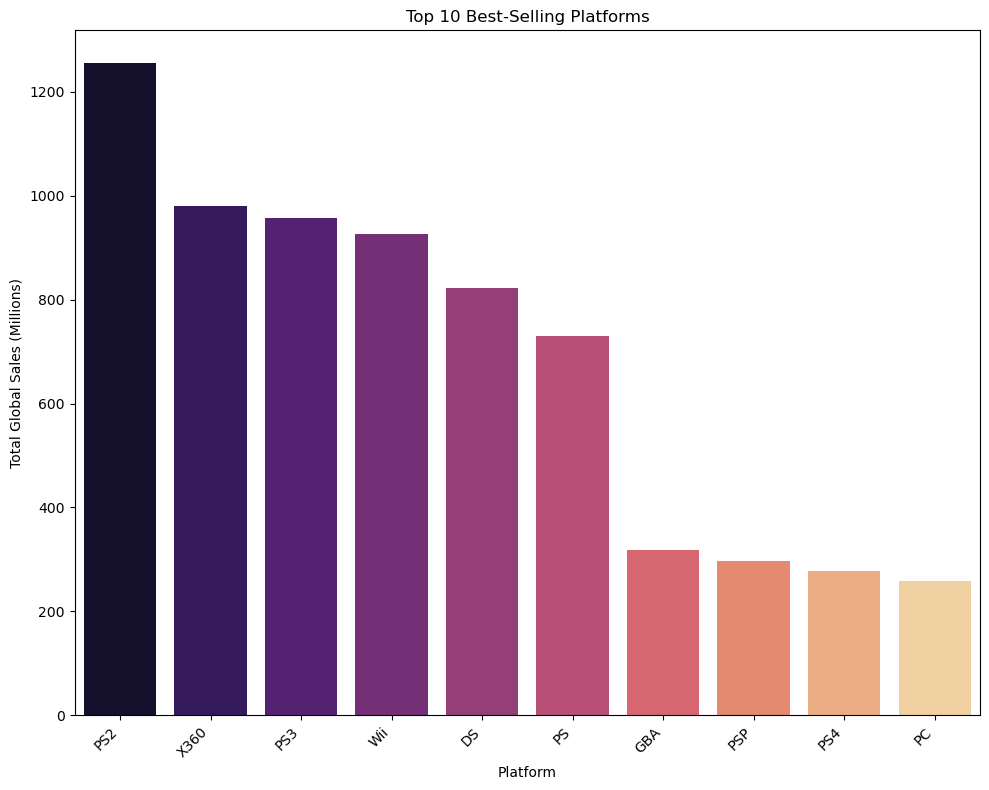

In [119]:
#11. What are the best-selling platforms?


platform_sales = df2.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
# Create a bar chart of the top 10 best-selling platforms
plt.figure(figsize=(10, 8))
sns.barplot(x=platform_sales.head(10).index, y=platform_sales.head(10).values, palette='magma')
plt.title('Top 10 Best-Selling Platforms')
plt.xlabel('Platform')
plt.ylabel('Total Global Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

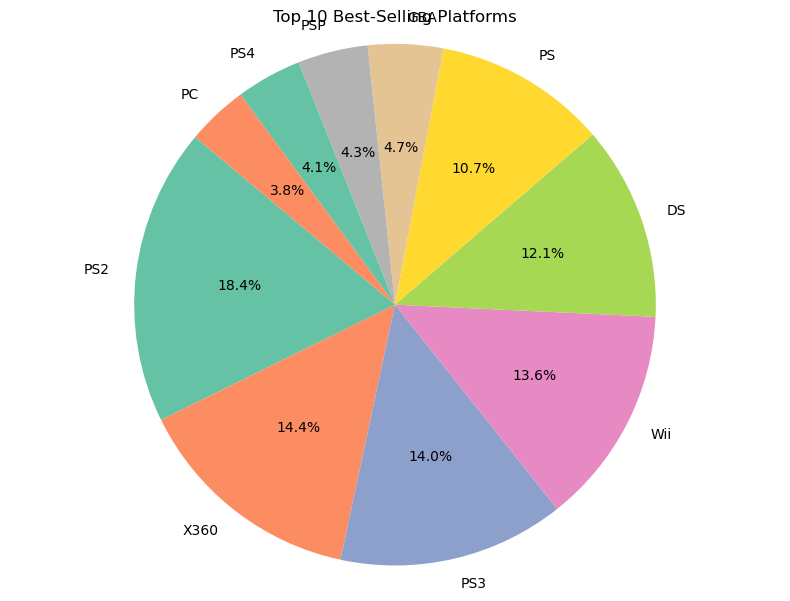

In [120]:
# Create a pie chart of the top 10 best-selling platforms
plt.figure(figsize=(8, 6))
plt.pie(platform_sales.head(10).values, labels=platform_sales.head(10).index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', len(platform_sales.head(10))))
plt.title('Top 10 Best-Selling Platforms')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

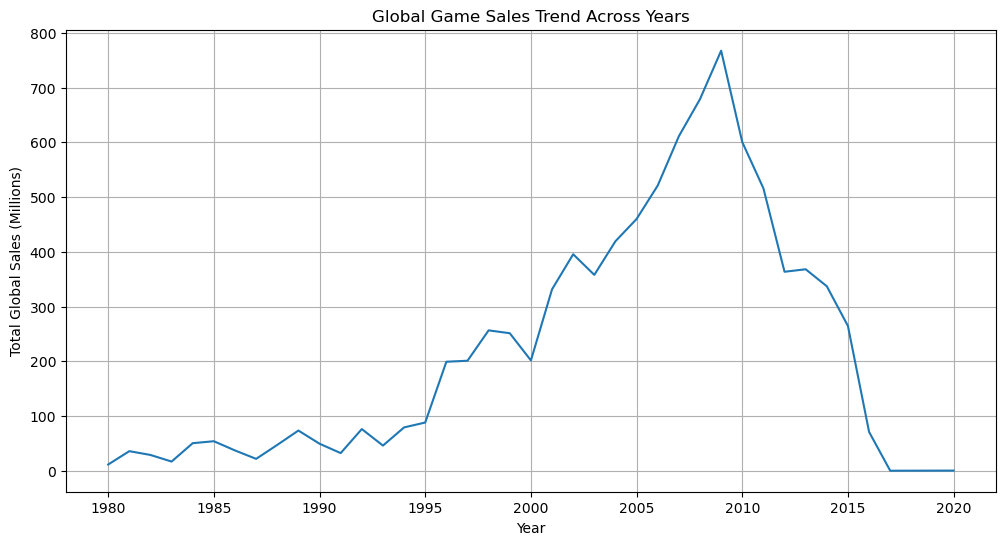

In [121]:
# 12.📅 What’s the trend of game releases and sales over years?

df2['Year'] = pd.to_numeric(df2['Year'], errors='coerce')

# Drop rows with NaN values in 'Year' after conversion
df2.dropna(subset=['Year'], inplace=True)

# Group by year and calculate total global sales
sales_by_year = df2.groupby('Year')['Global_Sales'].sum()

# Create a line plot for the trend of global sales over years
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_by_year.index, y=sales_by_year.values)
plt.title('Global Game Sales Trend Across Years')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (Millions)')
plt.grid(True)
plt.show()

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/888487415.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_sales.head(10).values, y=publisher_sales.head(10).index, palette='hls')


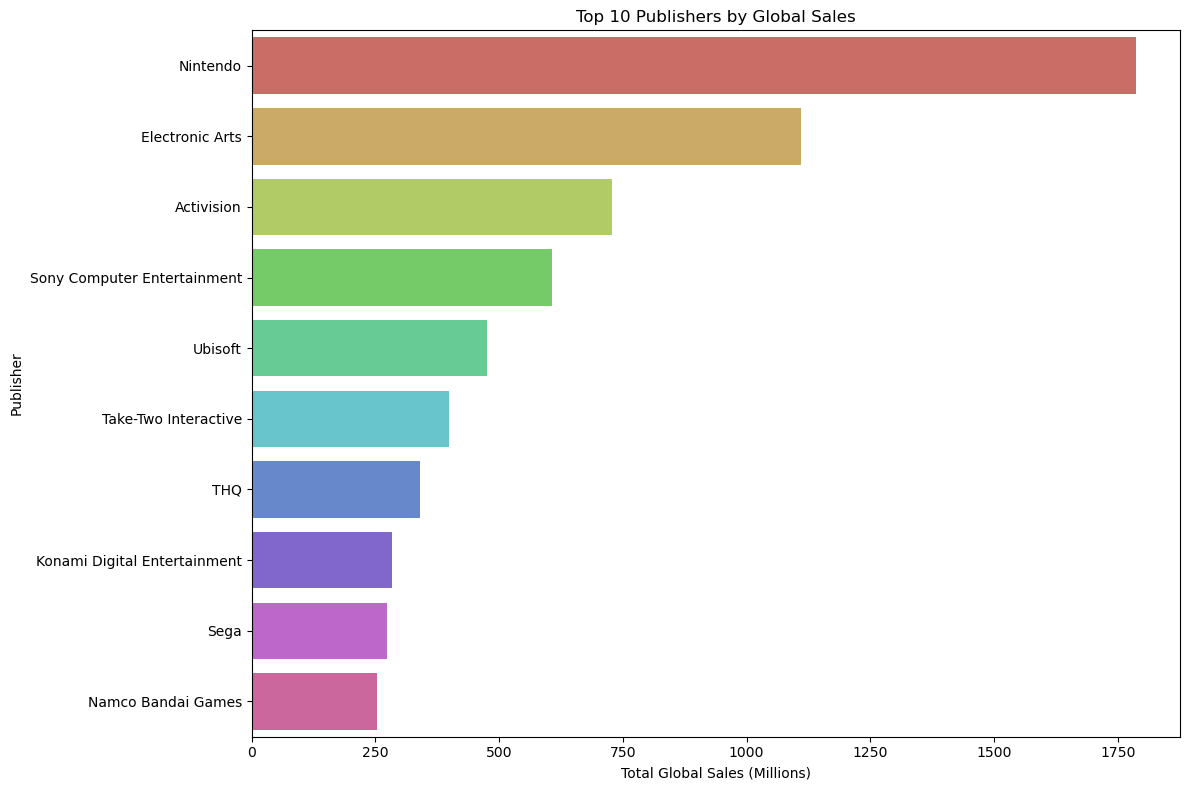

In [122]:
# 13. Who are the top publishers by sales?

publisher_sales = df2.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

# Create a bar chart of the top 10 publishers by global sales
plt.figure(figsize=(12, 8))
sns.barplot(x=publisher_sales.head(10).values, y=publisher_sales.head(10).index, palette='hls')
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Total Global Sales (Millions)')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

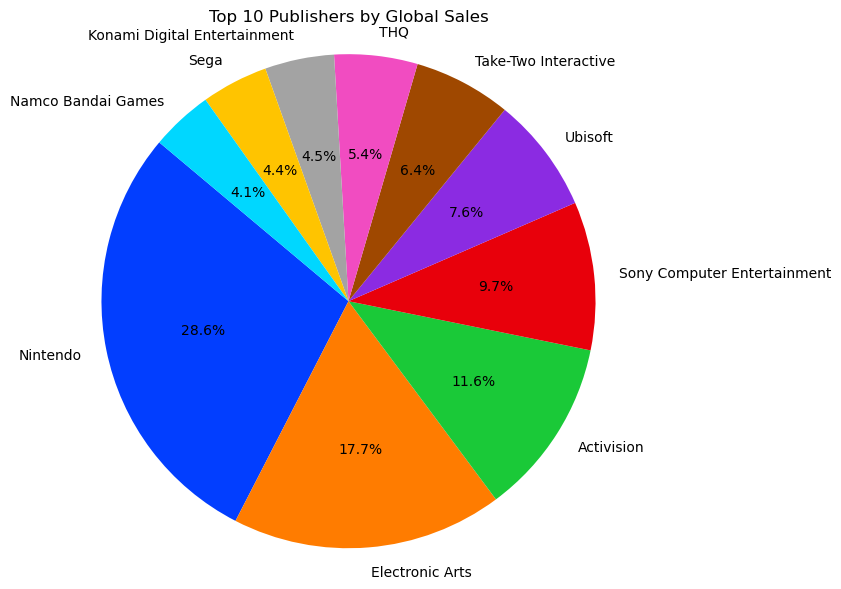

In [123]:
plt.figure(figsize=(8, 6))
plt.pie(publisher_sales.head(10).values, labels=publisher_sales.head(10).index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('bright', len(publisher_sales.head(10))))
plt.title('Top 10 Publishers by Global Sales')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/2374210377.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_games.values, y=top_10_games.index, palette='viridis')


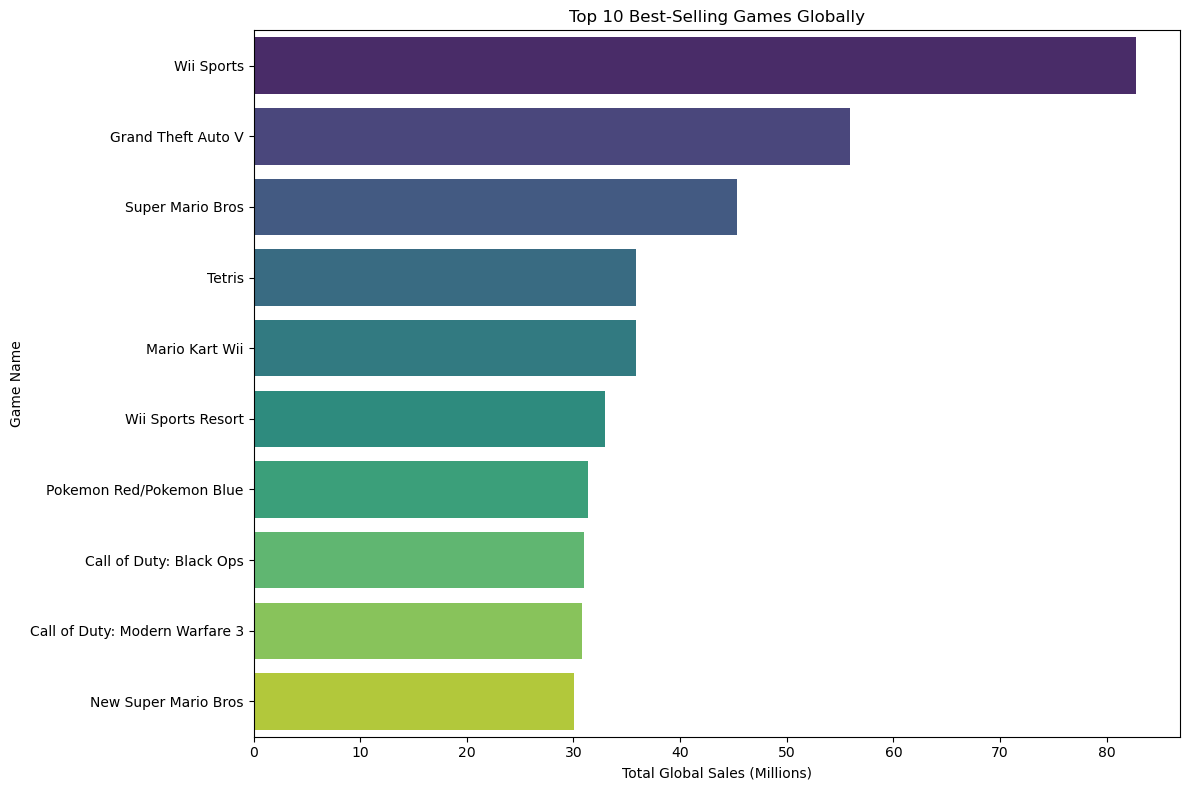

In [124]:
# 14. Which games are the top 10 best-sellers globally?

game_sales = df2.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False)
top_10_games = game_sales.head(10)

# Create a bar chart of the top 10 best-selling games globally
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_games.values, y=top_10_games.index, palette='viridis')
plt.title('Top 10 Best-Selling Games Globally')
plt.xlabel('Total Global Sales (Millions)')
plt.ylabel('Game Name')
plt.tight_layout()
plt.show()

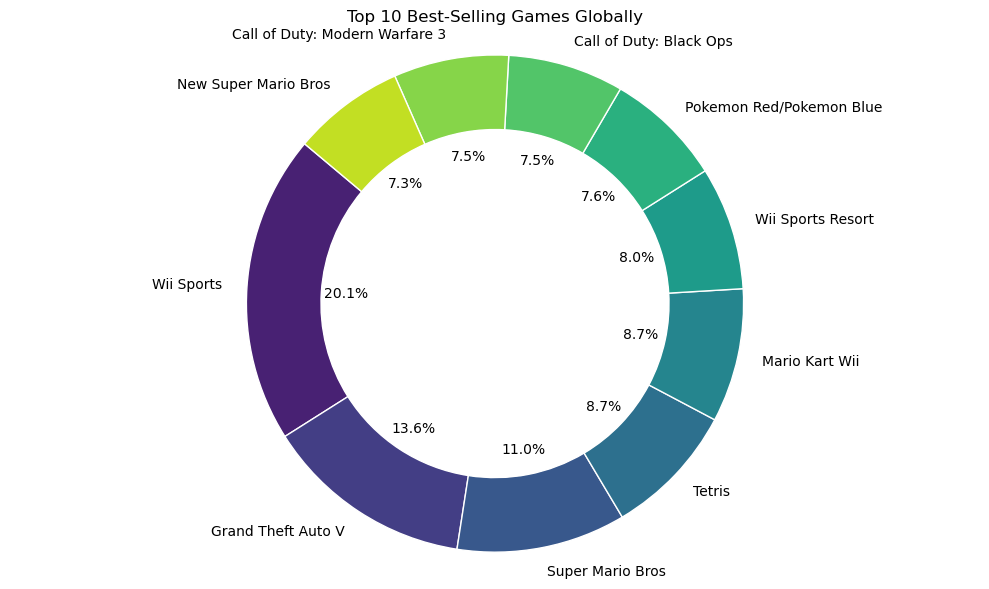

In [125]:
game_sales = df2.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.pie(game_sales.head(10).values, labels=game_sales.head(10).index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(game_sales.head(10))), wedgeprops={'edgecolor': 'white', 'width': 0.3})
plt.title('Top 10 Best-Selling Games Globally')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Draw a circle in the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

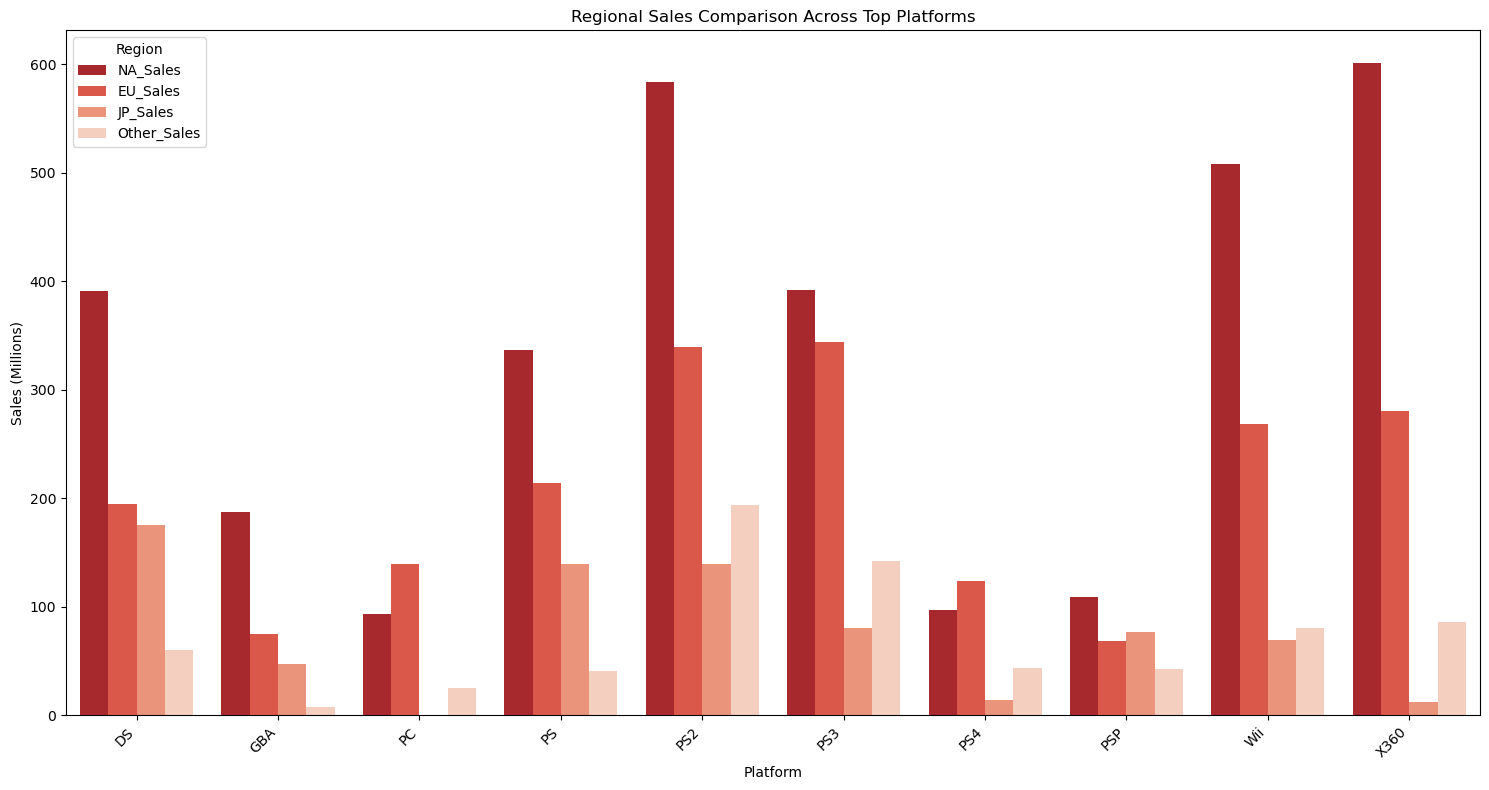

In [126]:
# 15.How do regional sales compare for specific platforms?

platform_regional_sales = df2.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# Melt the DataFrame to have a 'Region' column and a 'Sales' column
platform_regional_sales_melted = platform_regional_sales.melt(
    id_vars='Platform',
    var_name='Region',
    value_name='Sales'
)

# Filter for top N platforms for better visualization
top_platforms = df2.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10).index
platform_regional_sales_melted_filtered = platform_regional_sales_melted[
    platform_regional_sales_melted['Platform'].isin(top_platforms)
]

# Create a grouped bar plot
plt.figure(figsize=(15, 8))
sns.barplot(
    data=platform_regional_sales_melted_filtered,
    x='Platform',
    y='Sales',
    hue='Region',
    palette='Reds_r'
)
plt.title('Regional Sales Comparison Across Top Platforms')
plt.xlabel('Platform')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.tight_layout()
plt.show()


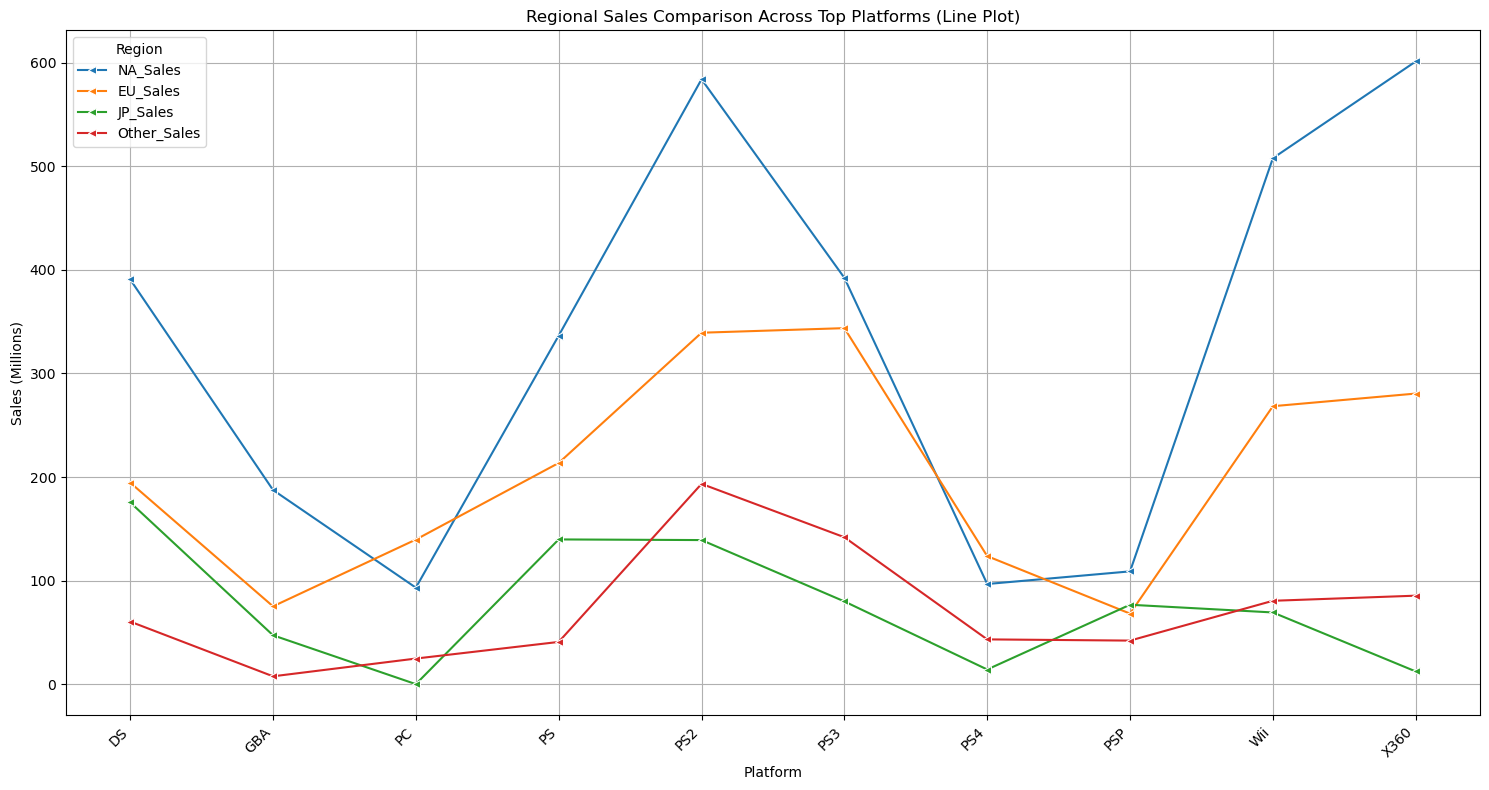

In [127]:
plt.figure(figsize=(15, 8))
sns.lineplot(
    data=platform_regional_sales_melted_filtered,
    x='Platform',
    y='Sales',
    hue='Region',
    marker='<' # Add markers to the lines
)

plt.title('Regional Sales Comparison Across Top Platforms (Line Plot)')
plt.xlabel('Platform')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()

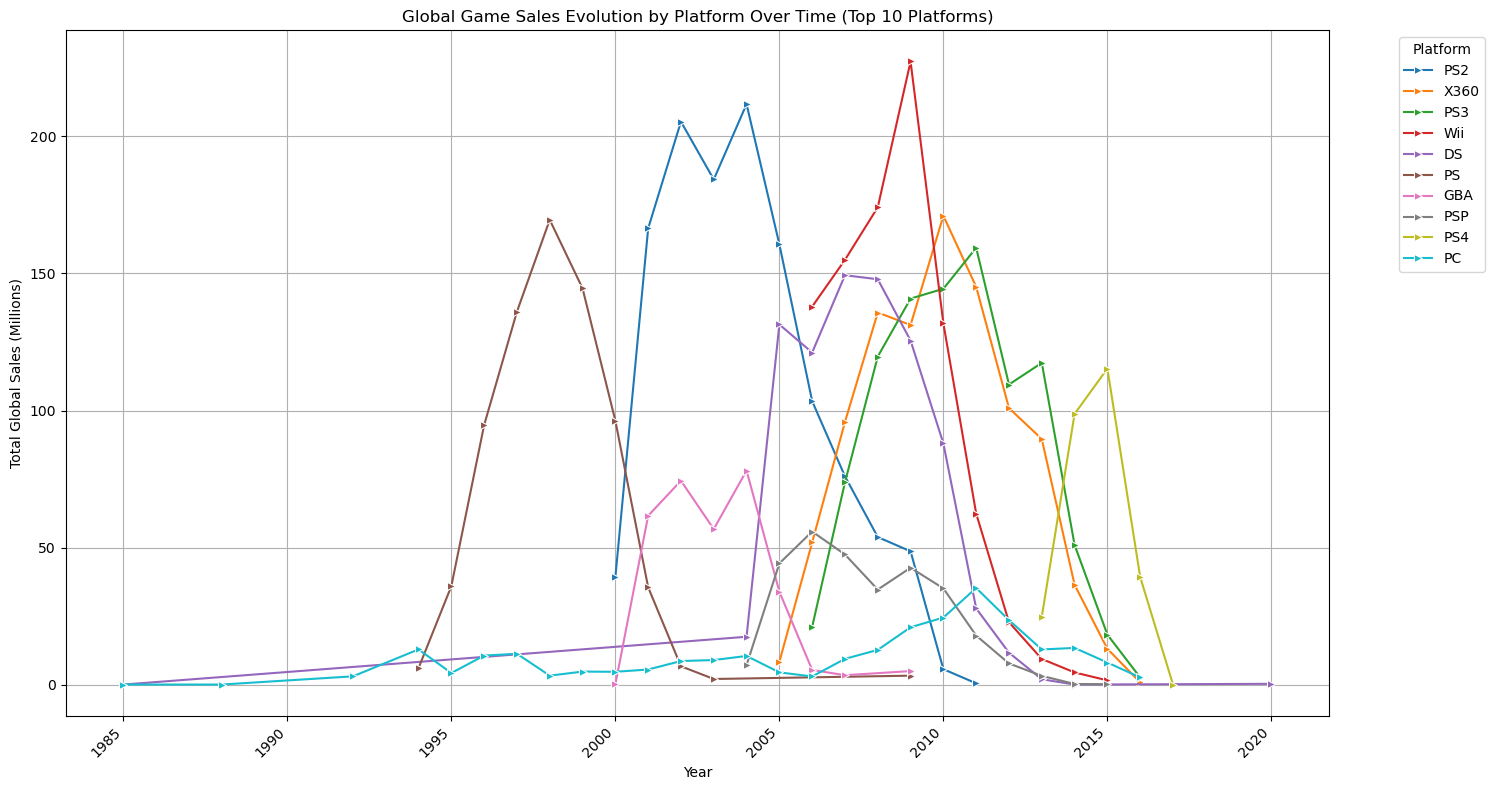

In [128]:
# 16. How has the market evolved by platform over time?

sales_by_year_platform = df2.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()
top_platforms_list = df2.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10).index.tolist()
# Filter the data to include only the top platforms
sales_by_year_platform_filtered = sales_by_year_platform[sales_by_year_platform['Platform'].isin(top_platforms_list)]
plt.figure(figsize=(15, 8))
for platform in top_platforms_list:
    platform_data_time = sales_by_year_platform_filtered[sales_by_year_platform_filtered['Platform'] == platform]
    sns.lineplot(data=platform_data_time, x='Year', y='Global_Sales', label=platform, marker='>')

plt.title('Global Game Sales Evolution by Platform Over Time (Top 10 Platforms)')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

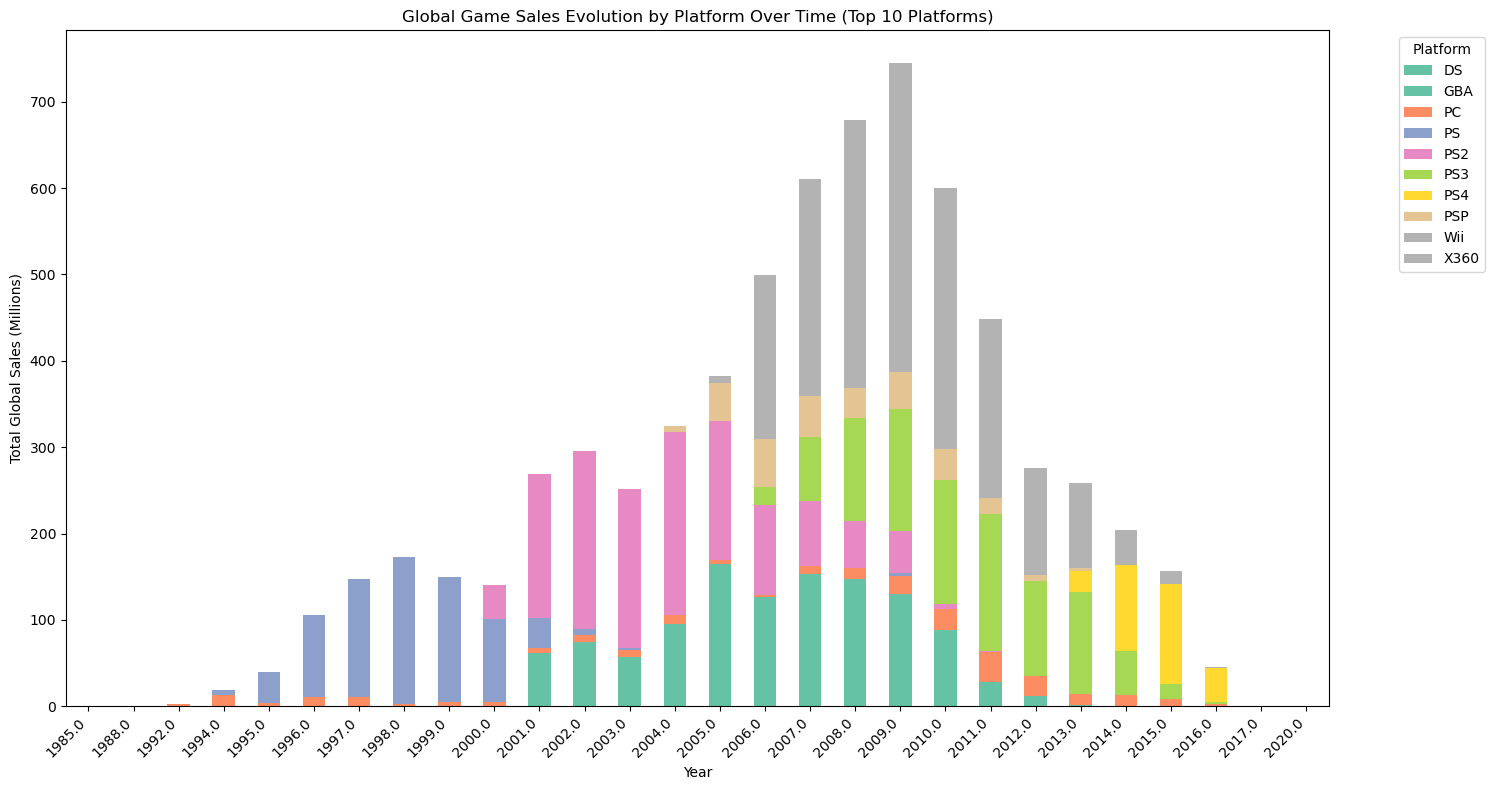

In [129]:
# 16. How has the market evolved by platform over time?

sales_by_year_platform = df2.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()
top_platforms_list = df2.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10).index.tolist()
sales_by_year_platform_filtered = sales_by_year_platform[sales_by_year_platform['Platform'].isin(top_platforms_list)]
sales_pivot = sales_by_year_platform_filtered.pivot_table(index='Year', columns='Platform', values='Global_Sales', fill_value=0)

# Create a stacked bar chart to show the evolution of sales by platform over time
plt.figure(figsize=(15, 8))
sales_pivot.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='Set2')

plt.title('Global Game Sales Evolution by Platform Over Time (Top 10 Platforms)')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

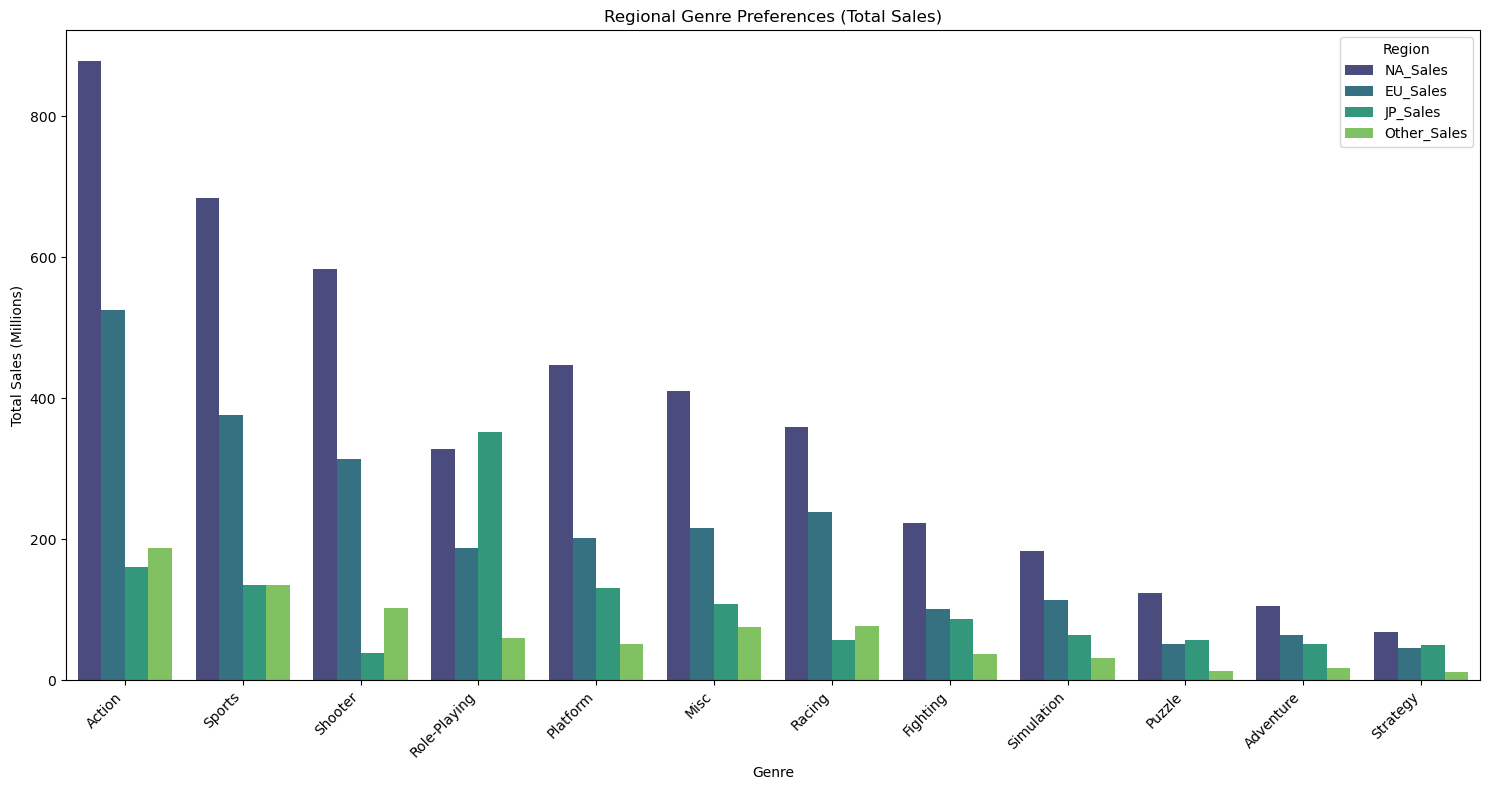

In [130]:
# 17. What are the regional genre preferences?

regional_genre_sales = df2.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
regional_genre_sales['Total_Sales'] = regional_genre_sales.sum(axis=1)
top_genres_by_sales = regional_genre_sales.sort_values(by='Total_Sales', ascending=False).head(20).index
regional_genre_sales_filtered = regional_genre_sales.loc[top_genres_by_sales]
regional_genre_sales_filtered = regional_genre_sales_filtered.drop(columns=['Total_Sales'])

# Melt the DataFrame to have a 'Region' column and a 'Sales' column
regional_genre_sales_melted = regional_genre_sales_filtered.reset_index().melt(
    id_vars='Genre',
    var_name='Region',
    value_name='Sales'
)
plt.figure(figsize=(15, 8))
sns.barplot(
    data=regional_genre_sales_melted,
    x='Genre',
    y='Sales',
    hue='Region',
    palette='viridis'
)
plt.title('Regional Genre Preferences (Total Sales)')
plt.xlabel('Genre')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

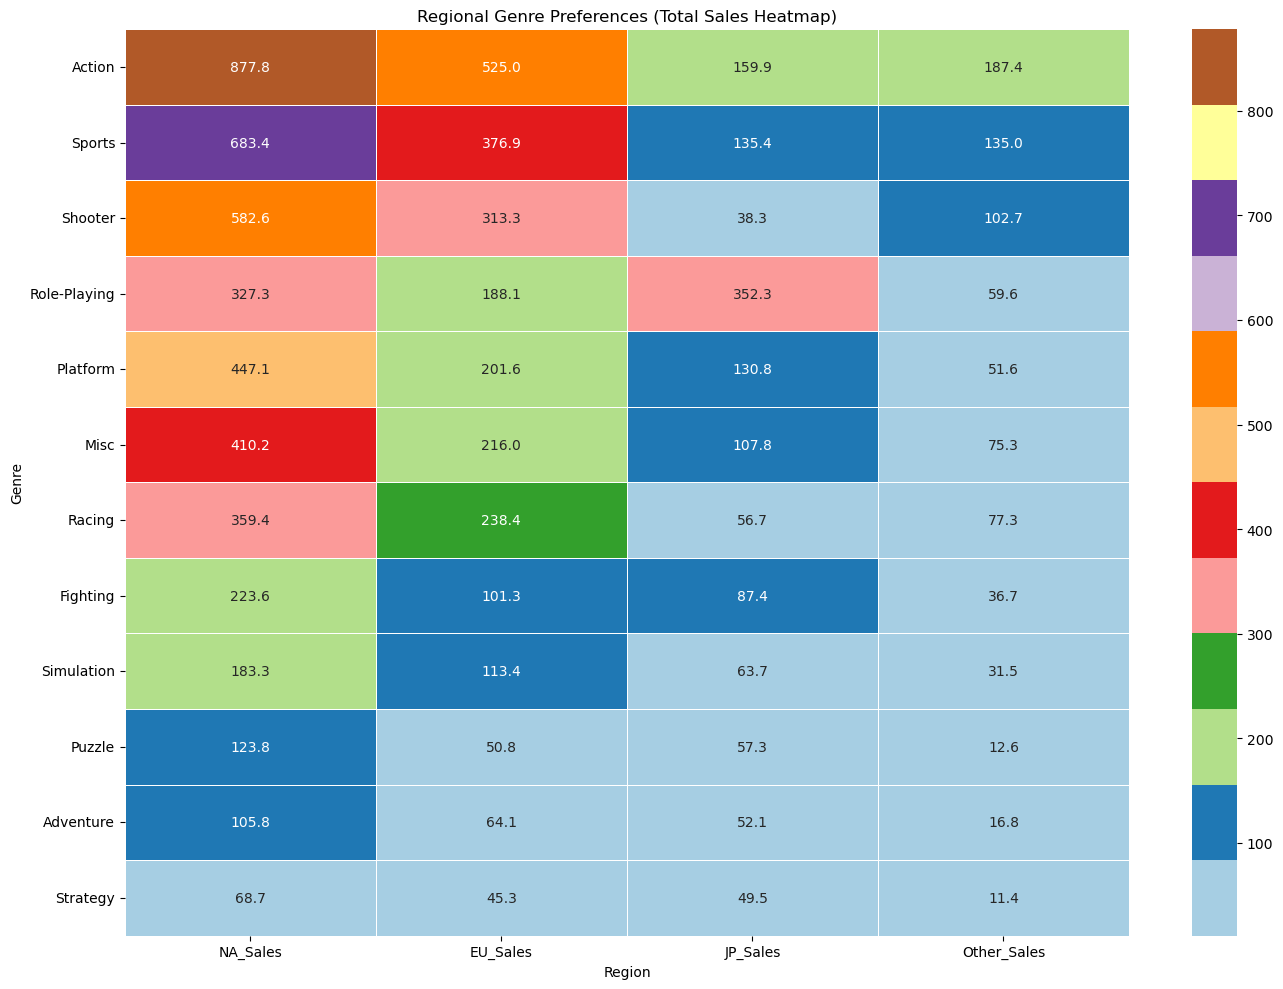

In [131]:
# 17. What are the regional genre preferences?

regional_genre_sales = df2.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
regional_genre_sales['Total_Sales'] = regional_genre_sales.sum(axis=1)
top_genres_by_sales = regional_genre_sales.sort_values(by='Total_Sales', ascending=False).head(20).index
regional_genre_sales_filtered = regional_genre_sales.loc[top_genres_by_sales]
regional_genre_sales_filtered = regional_genre_sales_filtered.drop(columns=['Total_Sales'])

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(regional_genre_sales_filtered, annot=True, fmt=".1f", cmap="Paired", linewidths=.5)

plt.title('Regional Genre Preferences (Total Sales Heatmap)')
plt.xlabel('Region')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

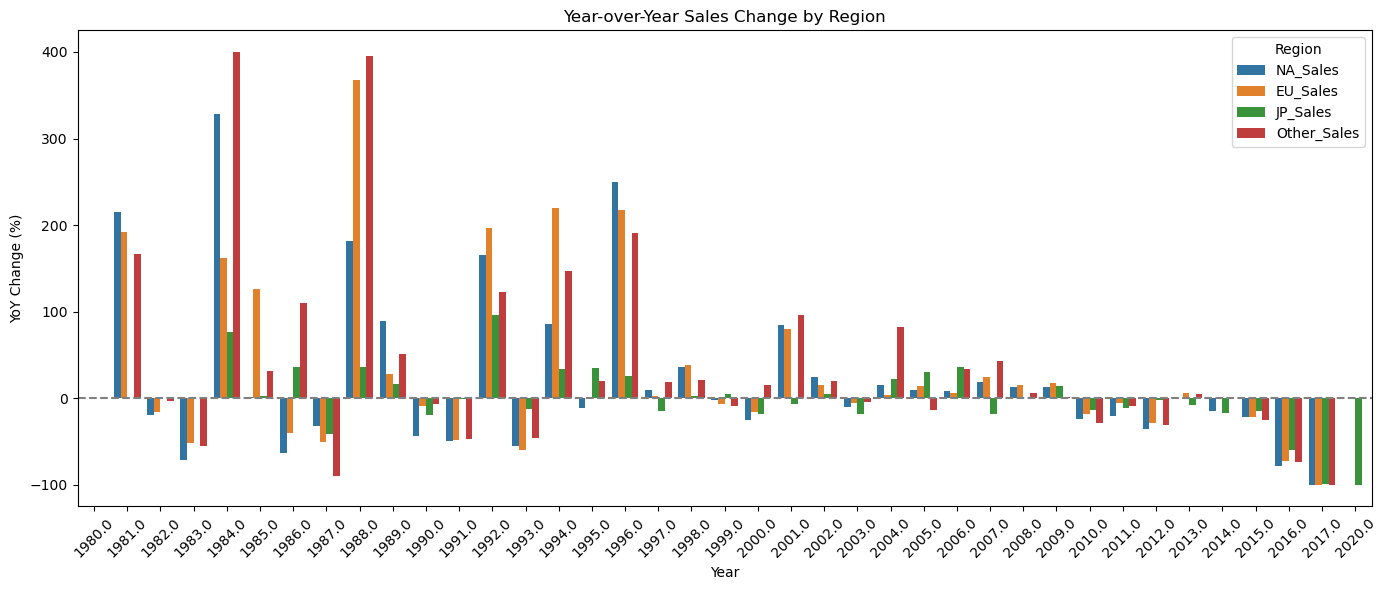

In [132]:
# 18. What’s the yearly sales change per region?

region_sales_by_year = df2.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
region_sales_yoy = region_sales_by_year.pct_change() * 100  # percent change
region_sales_yoy = region_sales_yoy.reset_index().melt(id_vars='Year', var_name='Region', value_name='YoY_Change')

# create Plot
plt.figure(figsize=(14, 6))
import seaborn as sns
sns.barplot(data=region_sales_yoy, x='Year', y='YoY_Change', hue='Region')

plt.title('Year-over-Year Sales Change by Region')
plt.xlabel('Year')
plt.ylabel('YoY Change (%)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.axhline(0, color='gray', linestyle='--')  # reference line
plt.tight_layout()
plt.show()

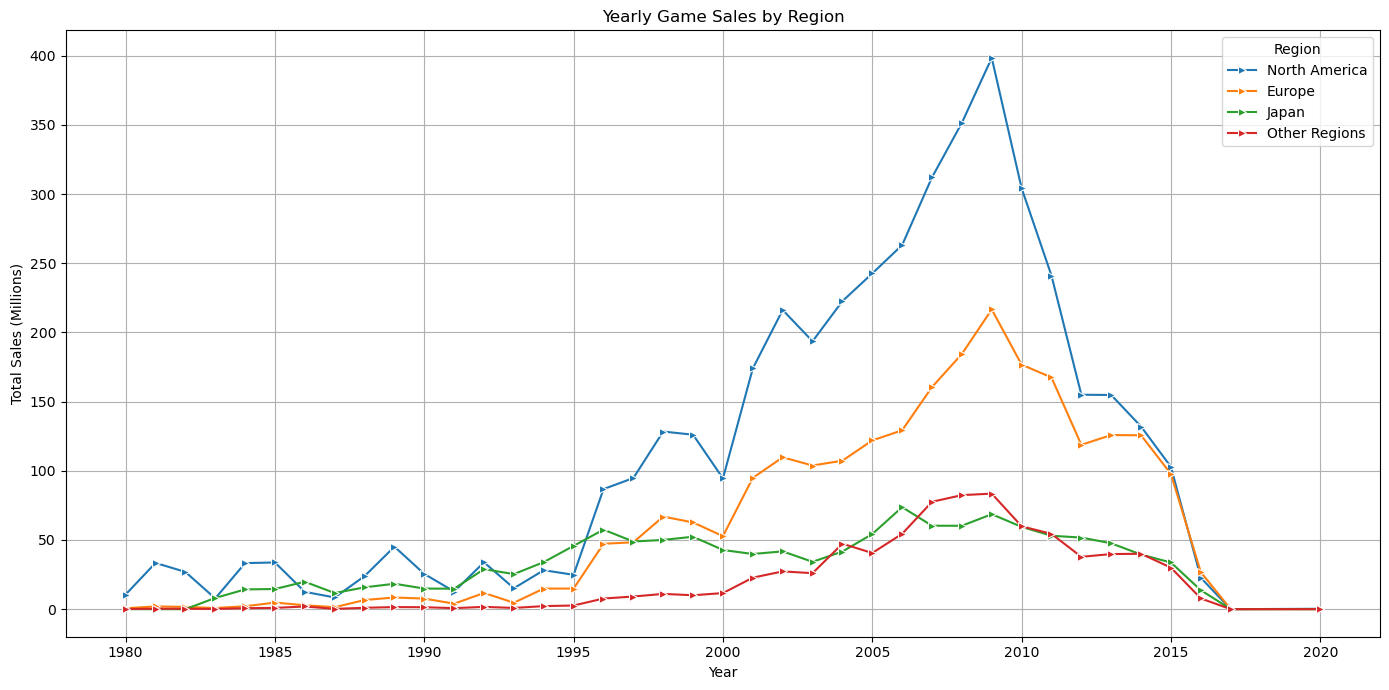

In [133]:
# 18. What’s the yearly sales change per region?

yearly_regional_sales = df2.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Create a line chart for yearly sales change by region
plt.figure(figsize=(14, 7))

sns.lineplot(data=yearly_regional_sales, x=yearly_regional_sales.index, y='NA_Sales', label='North America', marker='>')
sns.lineplot(data=yearly_regional_sales, x=yearly_regional_sales.index, y='EU_Sales', label='Europe', marker='>')
sns.lineplot(data=yearly_regional_sales, x=yearly_regional_sales.index, y='JP_Sales', label='Japan', marker='>')
sns.lineplot(data=yearly_regional_sales, x=yearly_regional_sales.index, y='Other_Sales', label='Other Regions', marker='>')

plt.title('Yearly Game Sales by Region')
plt.xlabel('Year')
plt.ylabel('Total Sales (Millions)')
plt.grid(True)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/3257734327.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers_by_avg_sales.values, y=top_publishers_by_avg_sales.index, palette='husl')


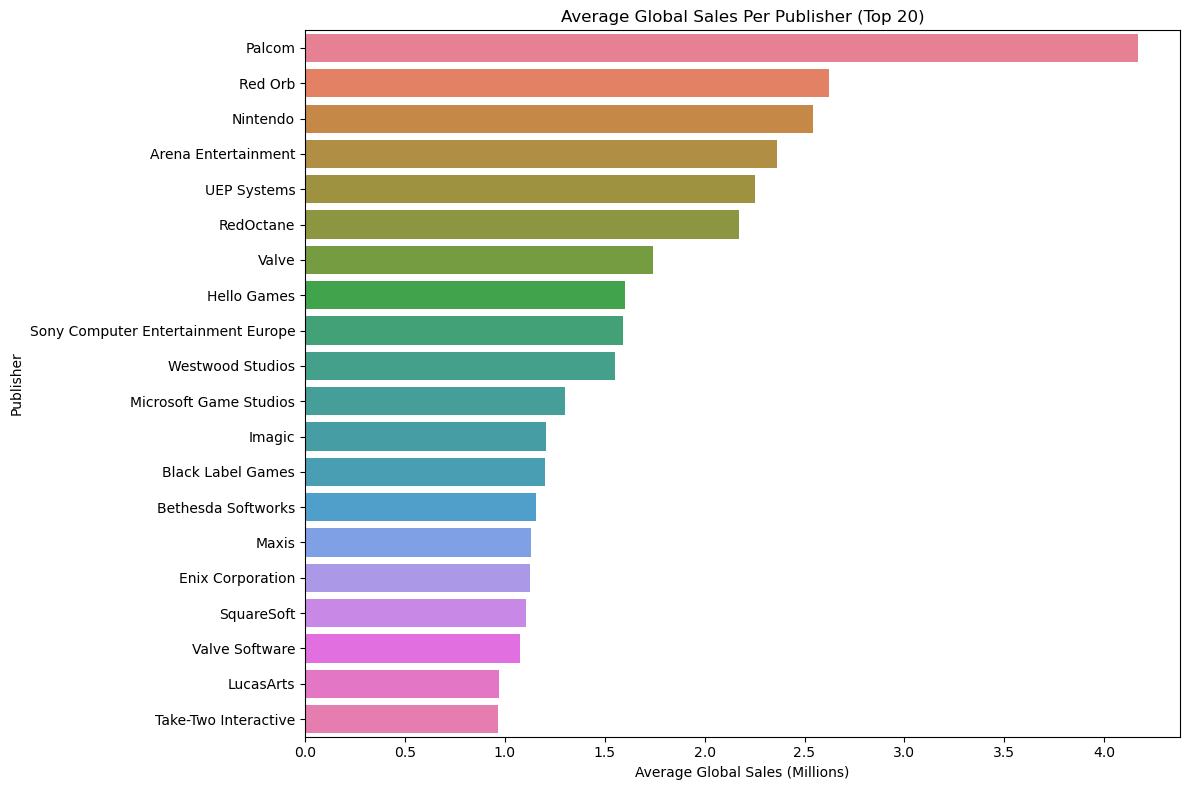

In [134]:
#19.What is the average sales per publisher?

average_publisher_sales = df2.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False)
top_publishers_by_avg_sales = average_publisher_sales.head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_publishers_by_avg_sales.values, y=top_publishers_by_avg_sales.index, palette='husl')
plt.title('Average Global Sales Per Publisher (Top 20)')
plt.xlabel('Average Global Sales (Millions)')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/849232393.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_games_per_platform = platform_game_sales.groupby('Platform').apply(get_top_n_games).reset_index(drop=True)


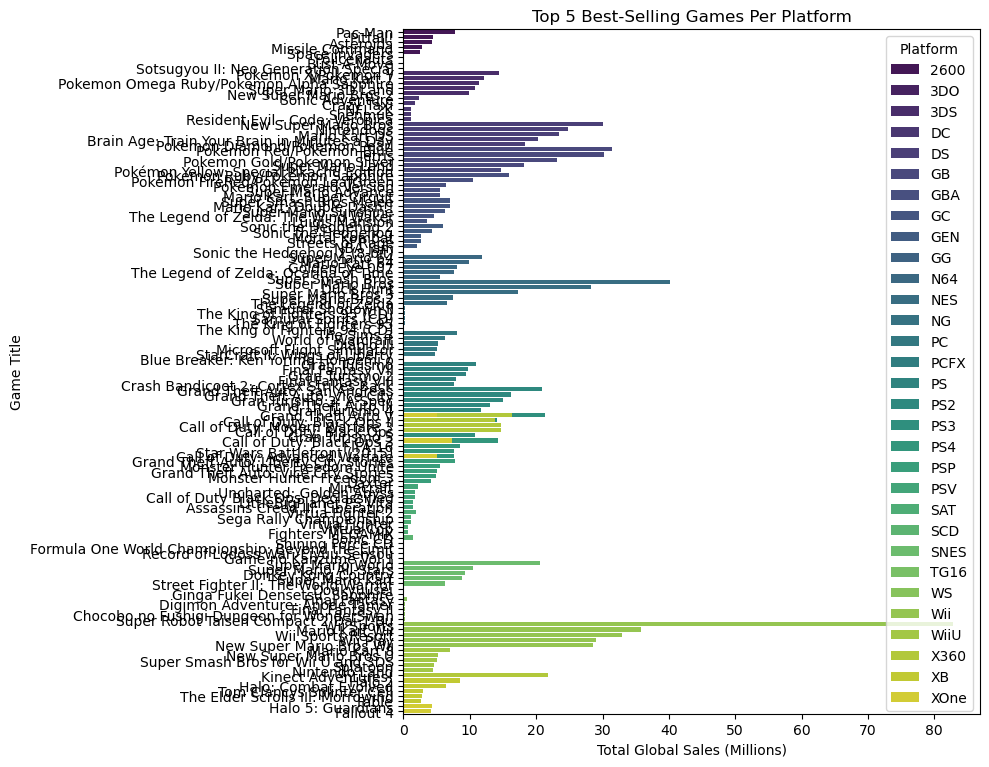

In [135]:
# 20. What are the top 5 best-selling games per platform?

platform_game_sales = df2.groupby(['Platform', 'Name'])['Global_Sales'].sum().reset_index()

# Get the top 5 games for each platform
def get_top_n_games(group, n=5):
  return group.sort_values(by='Global_Sales', ascending=False).head(n)

top_5_games_per_platform = platform_game_sales.groupby('Platform').apply(get_top_n_games).reset_index(drop=True)

# Create a grouped bar plot
plt.figure(figsize=(10, 8))
sns.barplot(
    data=top_5_games_per_platform,
    x='Global_Sales',
    y='Name',
    hue='Platform', # Use Platform for grouping
    palette='viridis',
    dodge=False # Set dodge to False to stack the bars if desired, or True for side-by-side grouped bars
)
plt.title('Top 5 Best-Selling Games Per Platform')
plt.xlabel('Total Global Sales (Millions)')
plt.ylabel('Game Title')
plt.legend(title='Platform')
plt.tight_layout()
plt.show()


/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_games_per_platform = platform_game_sales.groupby('Platform').apply(get_top_n_games).reset_index(drop=True)
/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


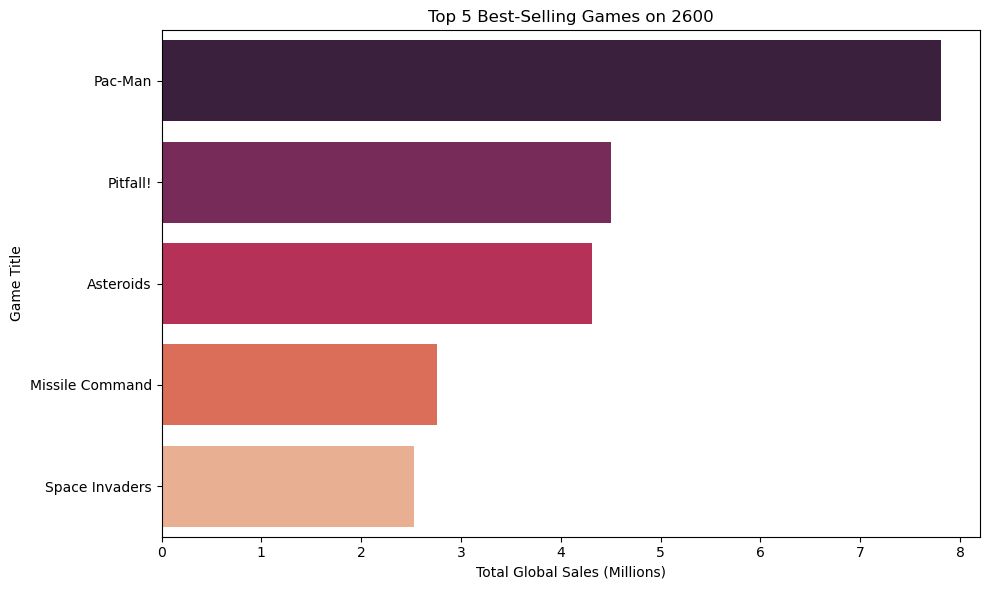

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


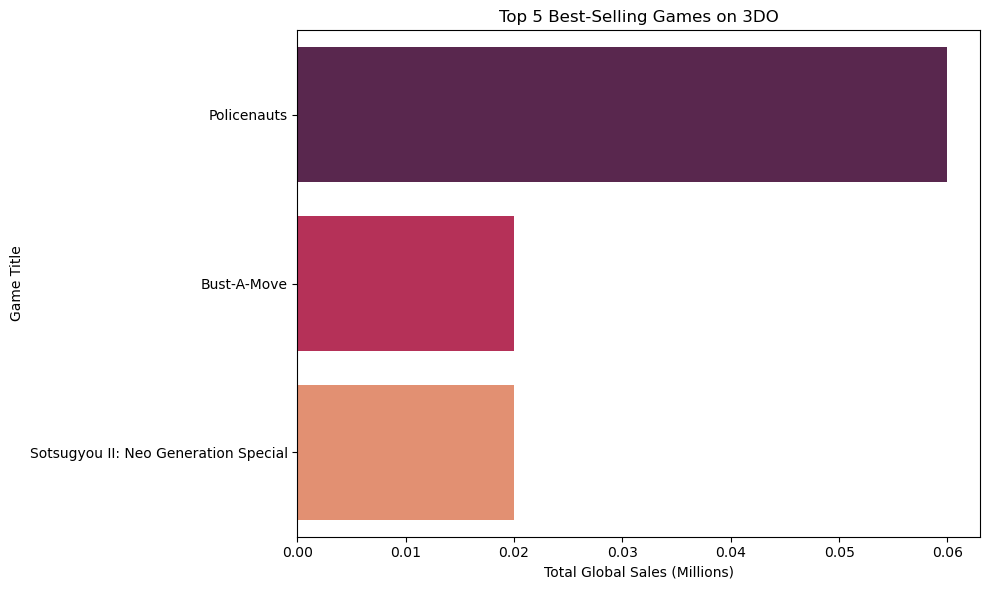

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


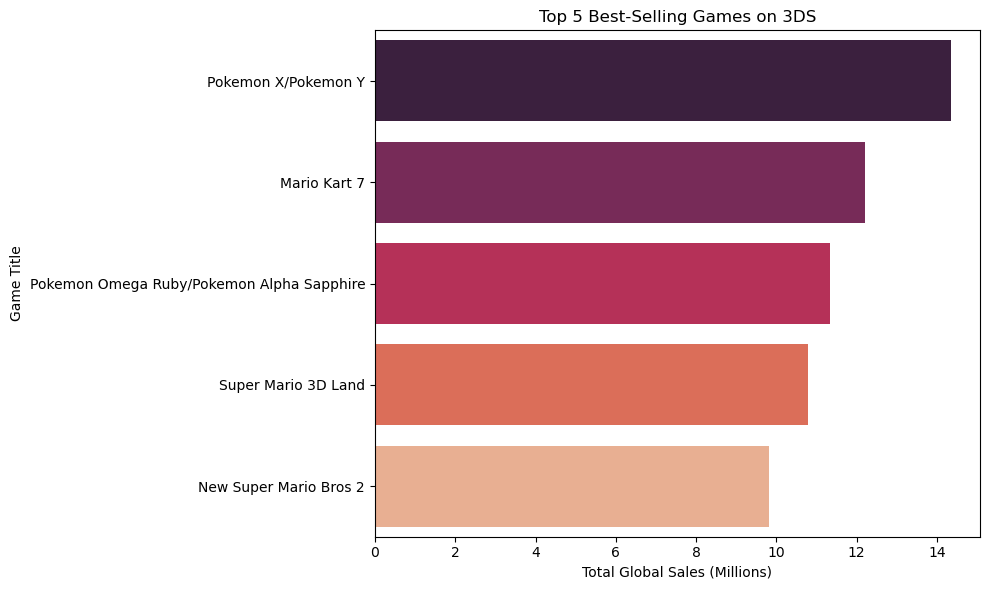

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


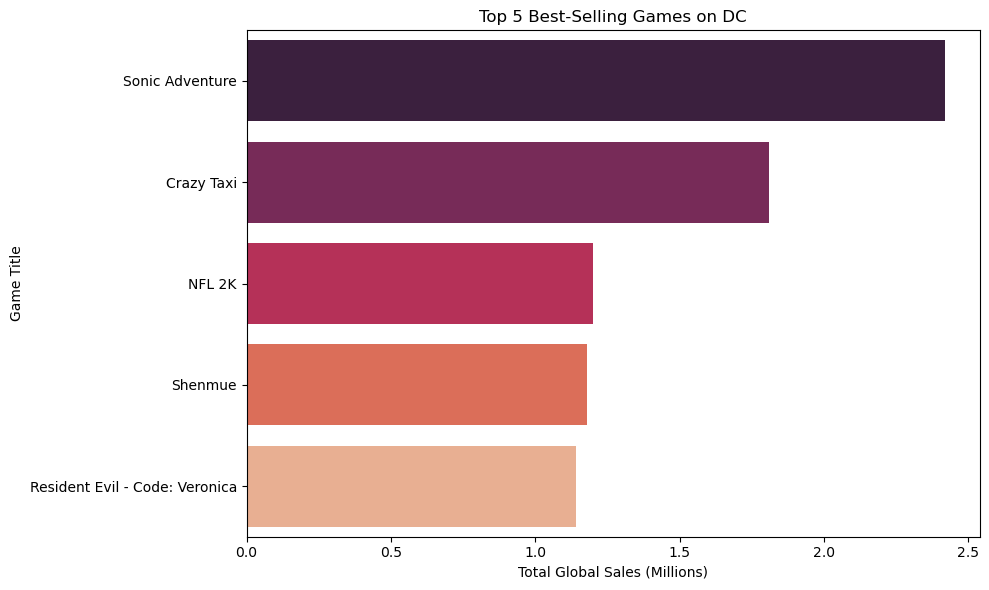

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


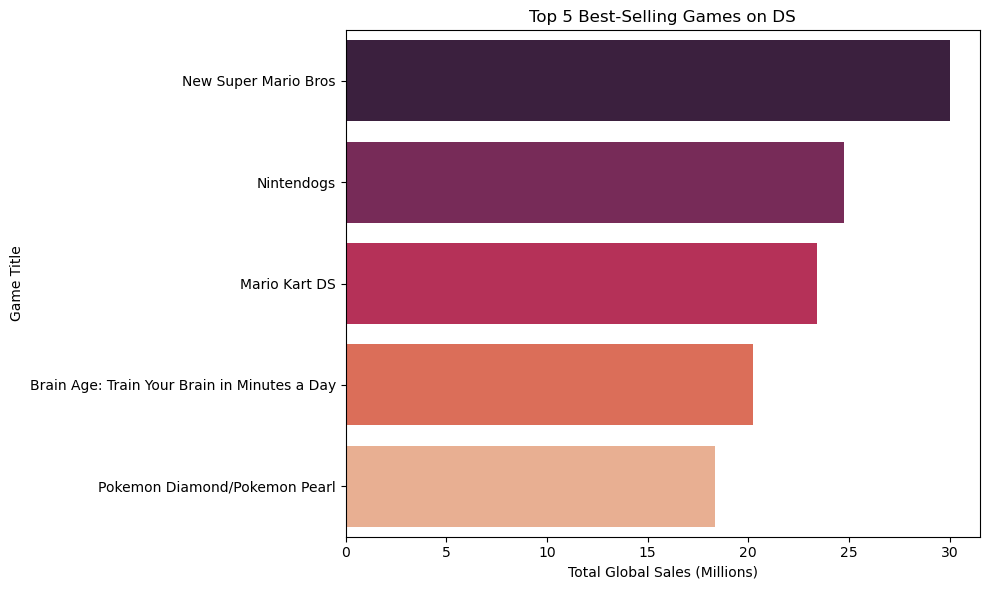

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


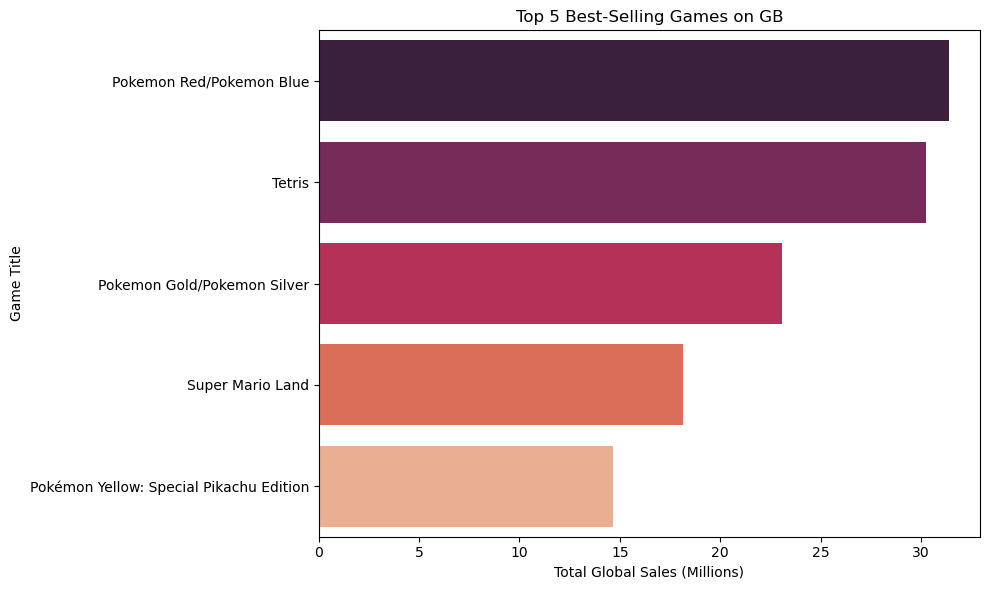

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


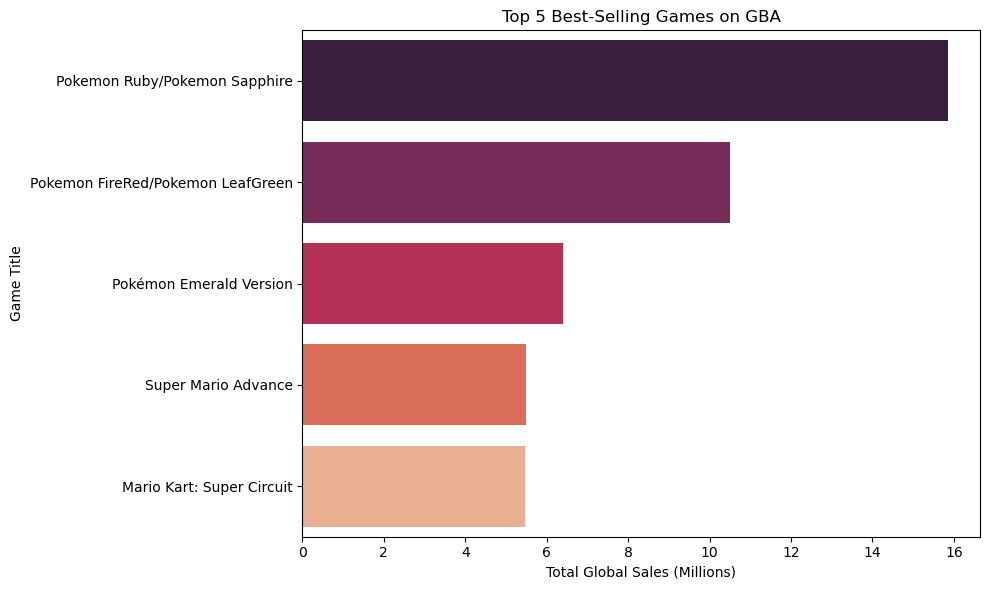

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


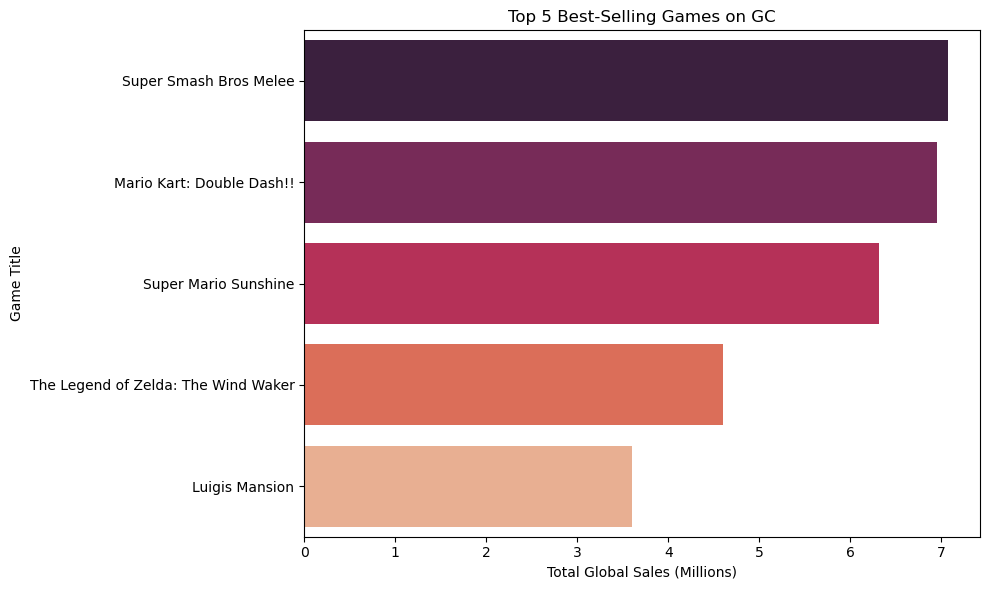

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


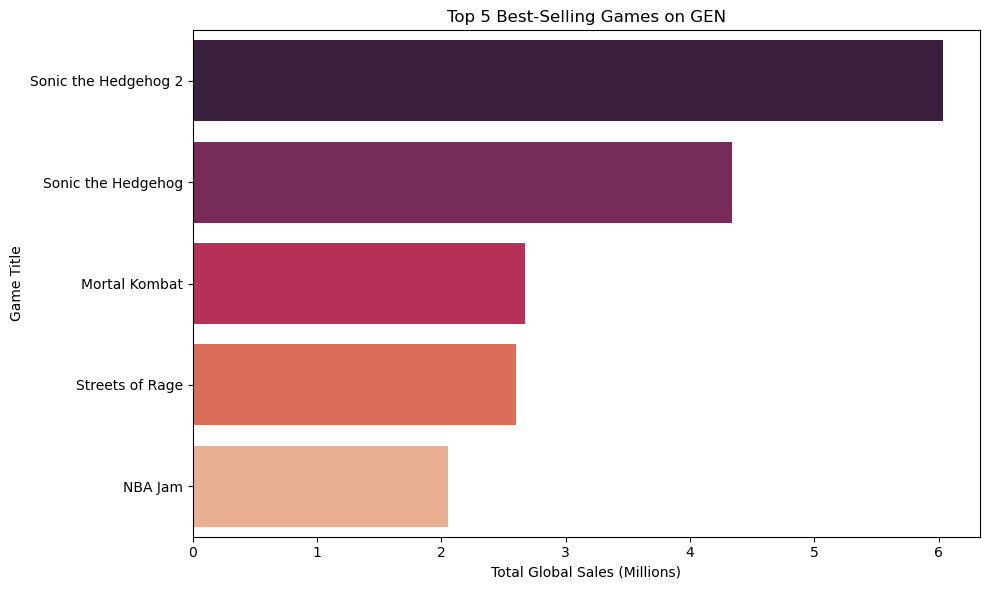

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


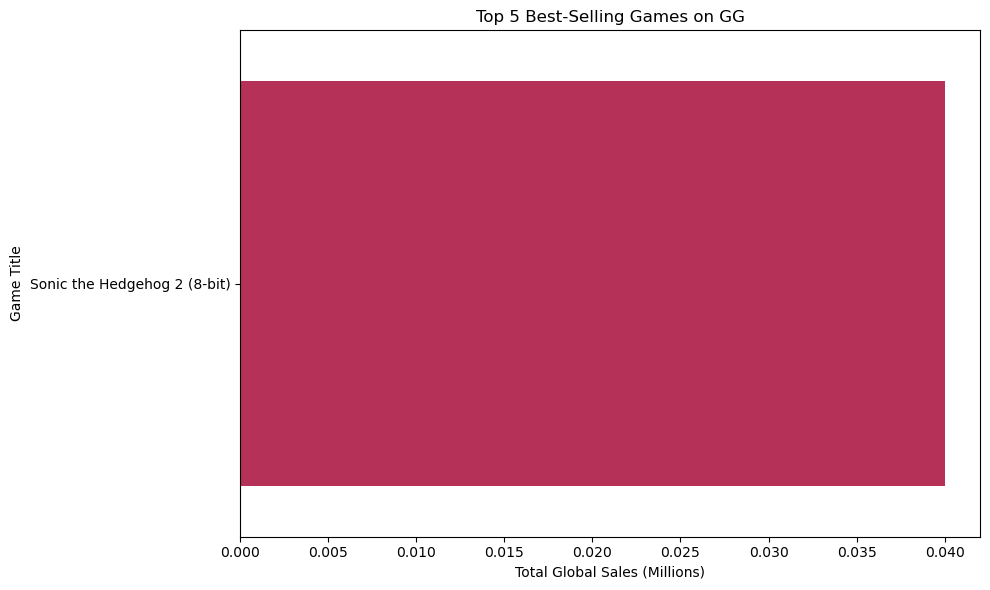

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


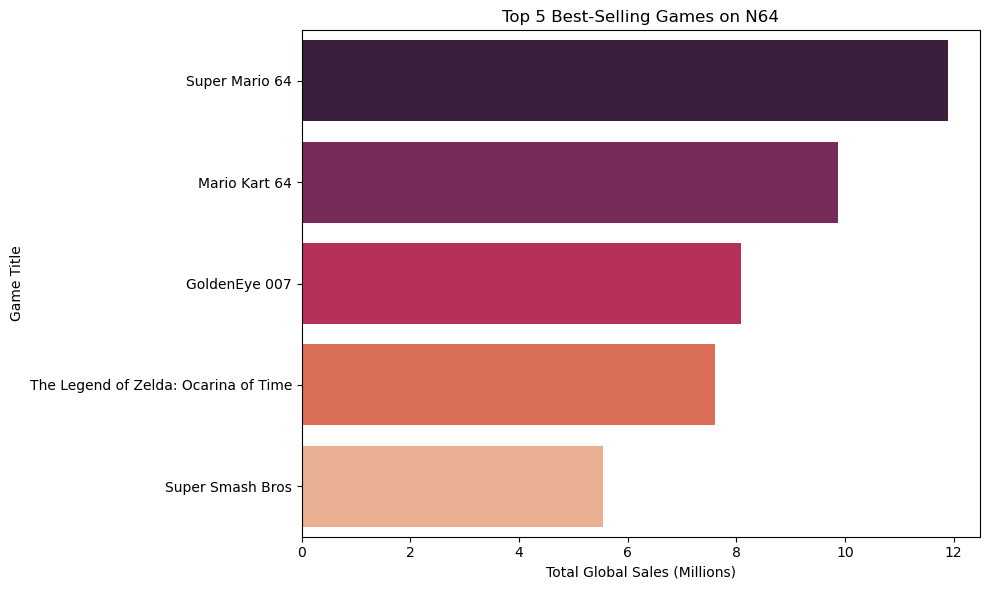

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


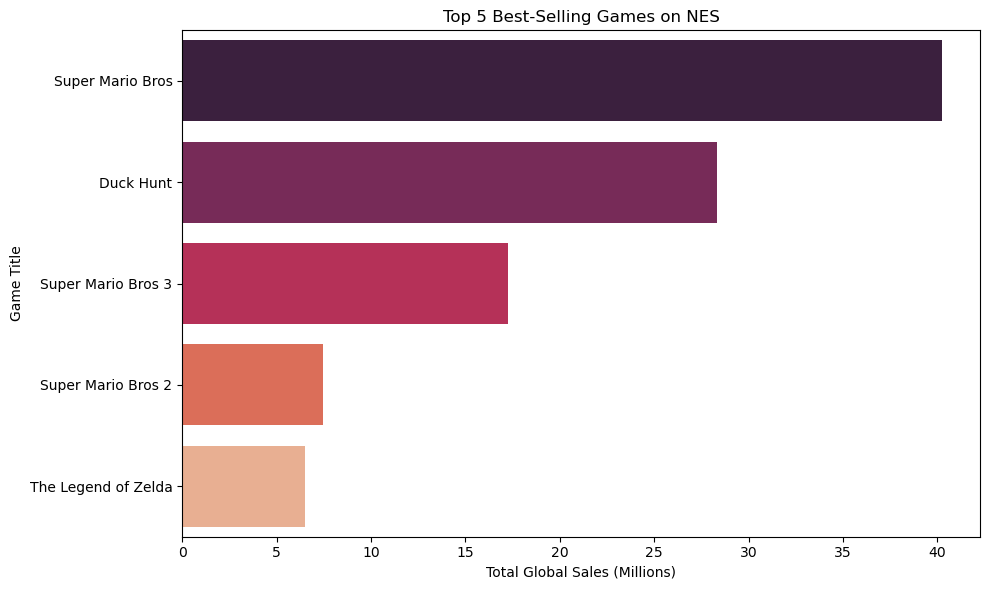

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


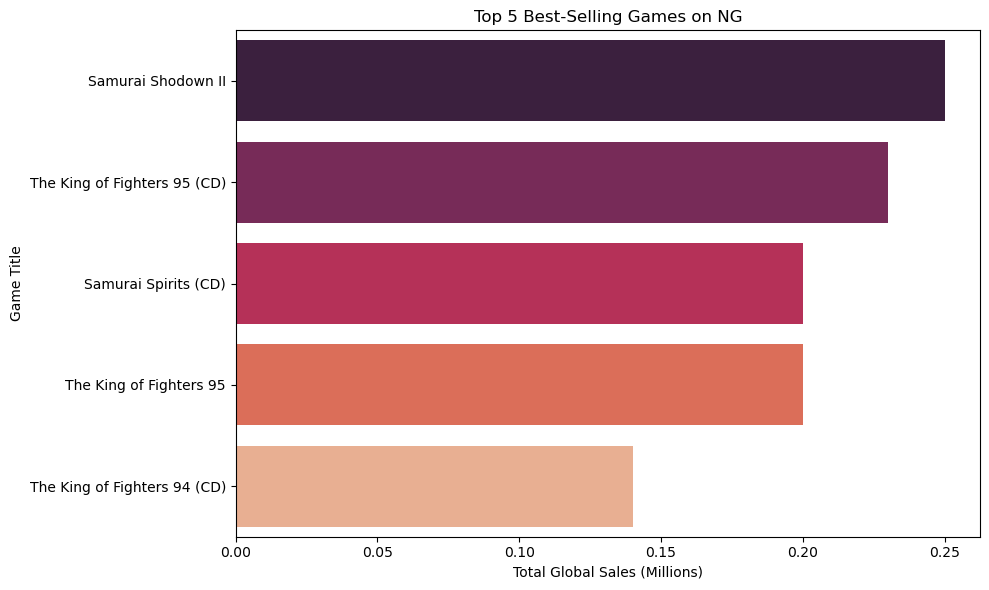

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


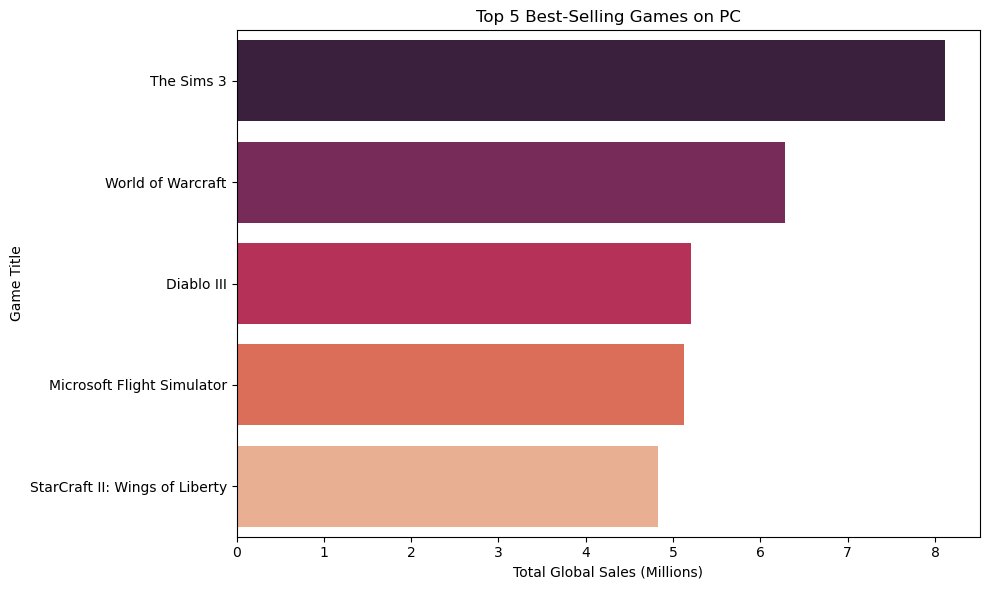

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


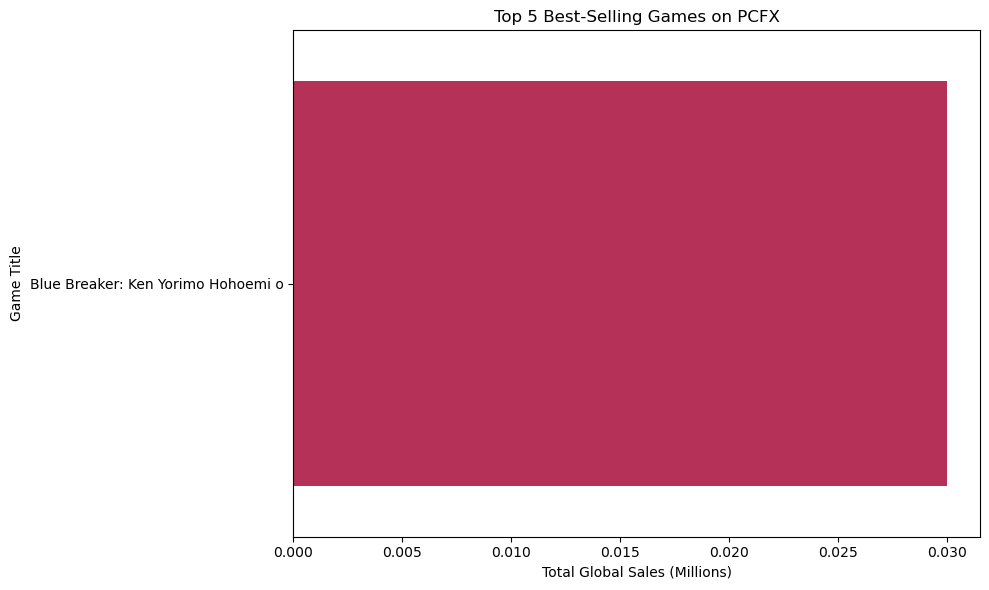

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


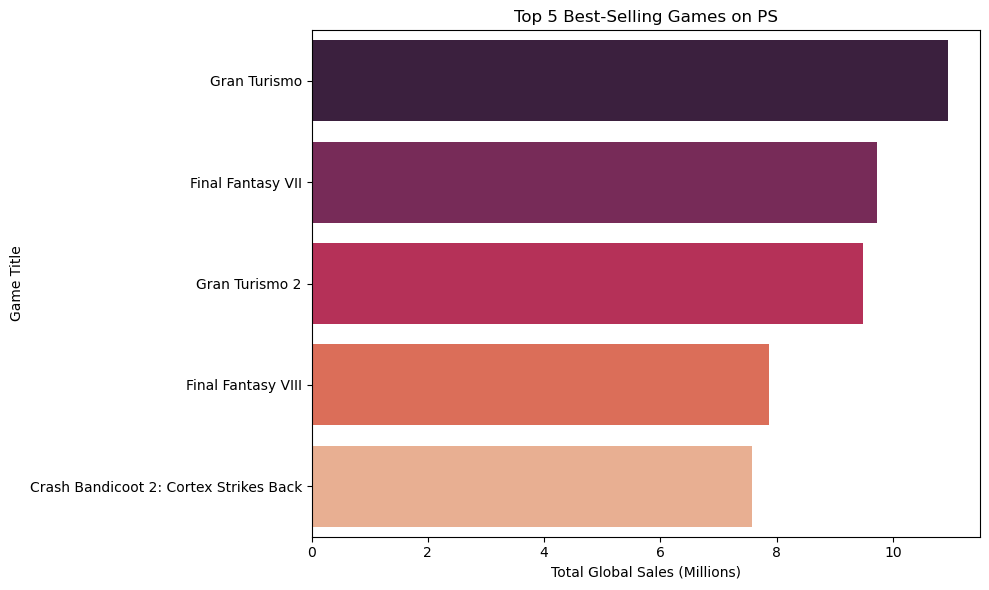

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


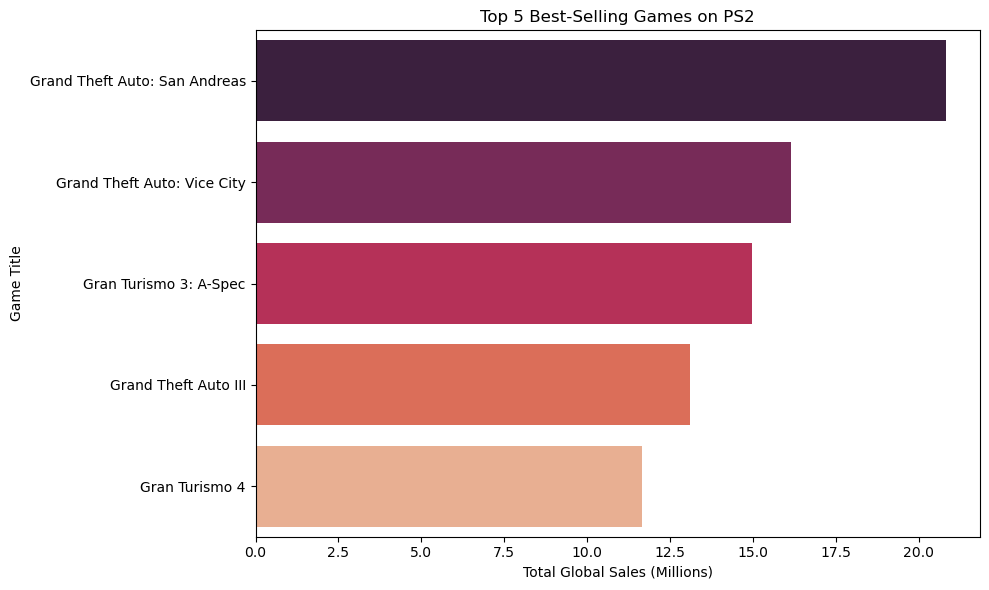

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


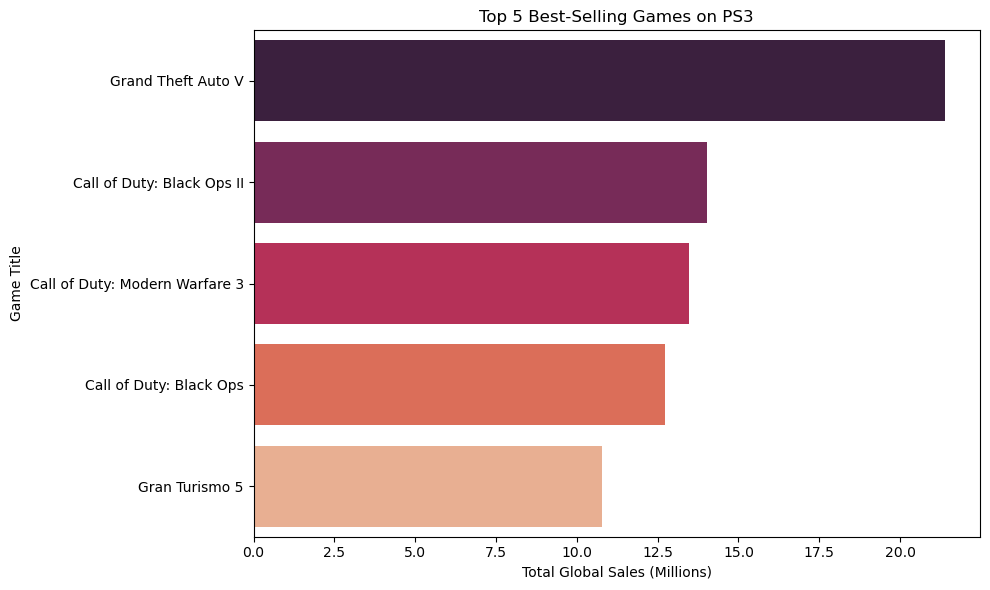

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


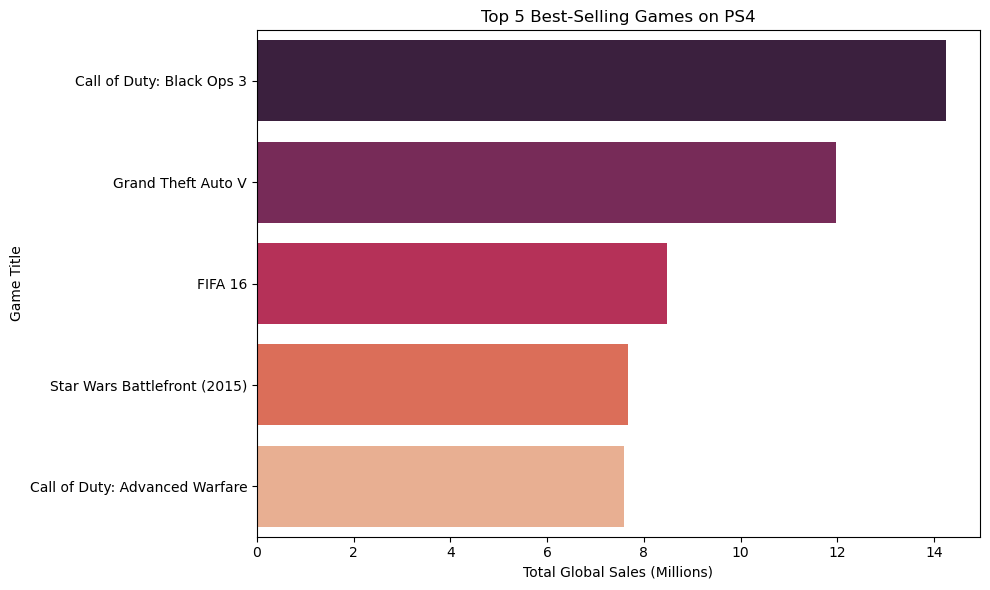

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


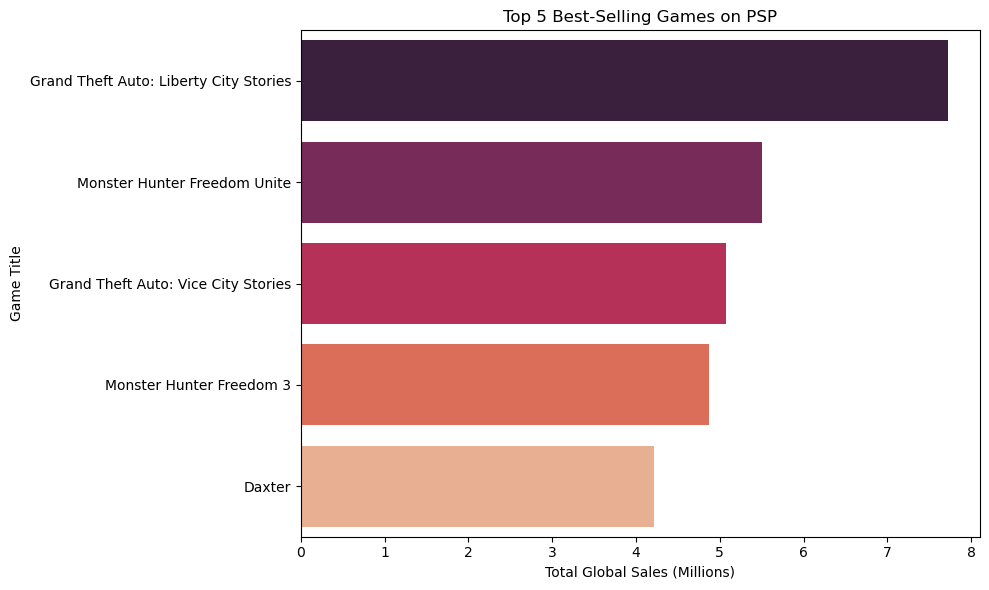

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


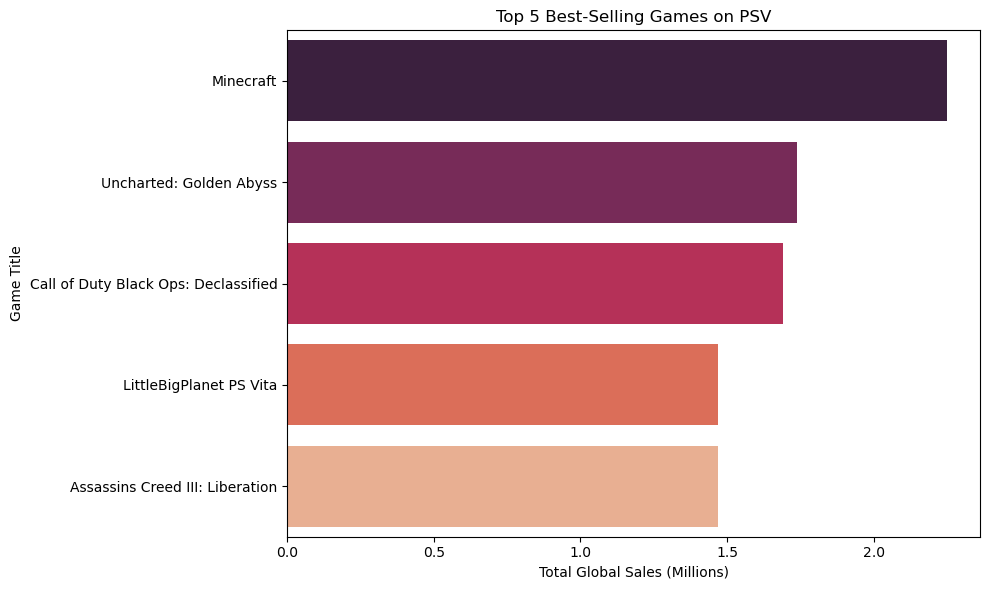

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


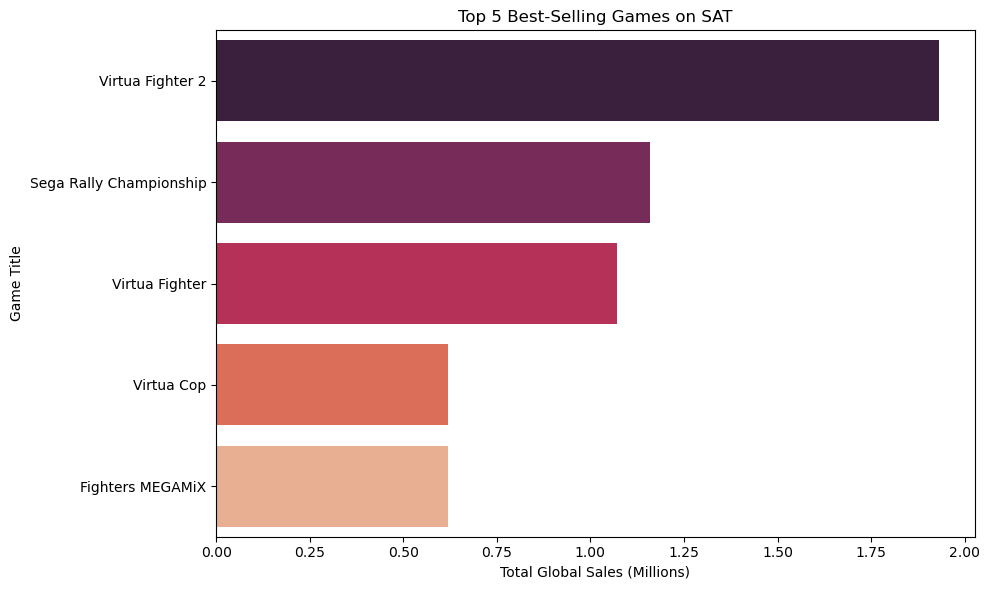

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


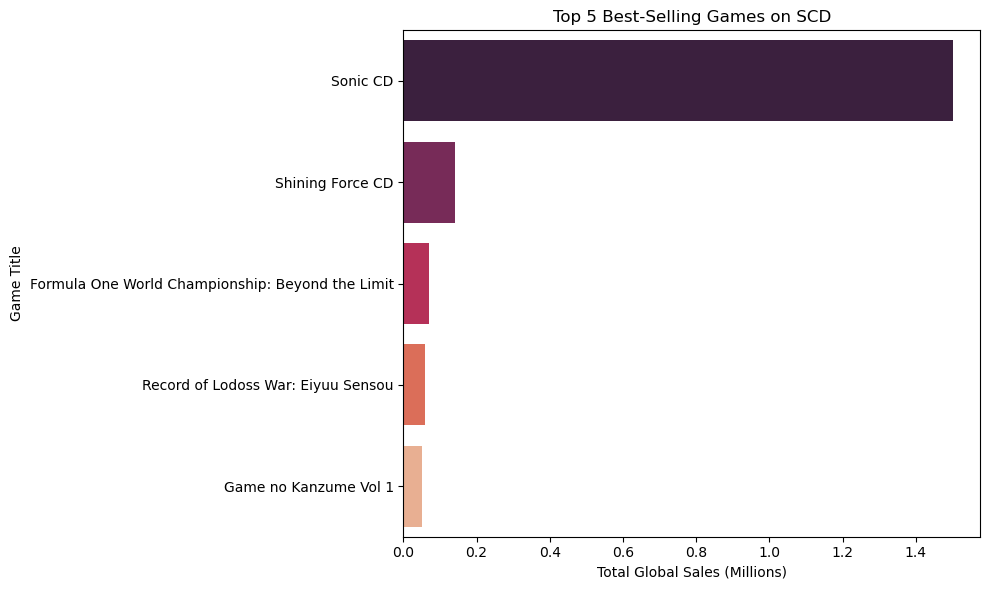

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


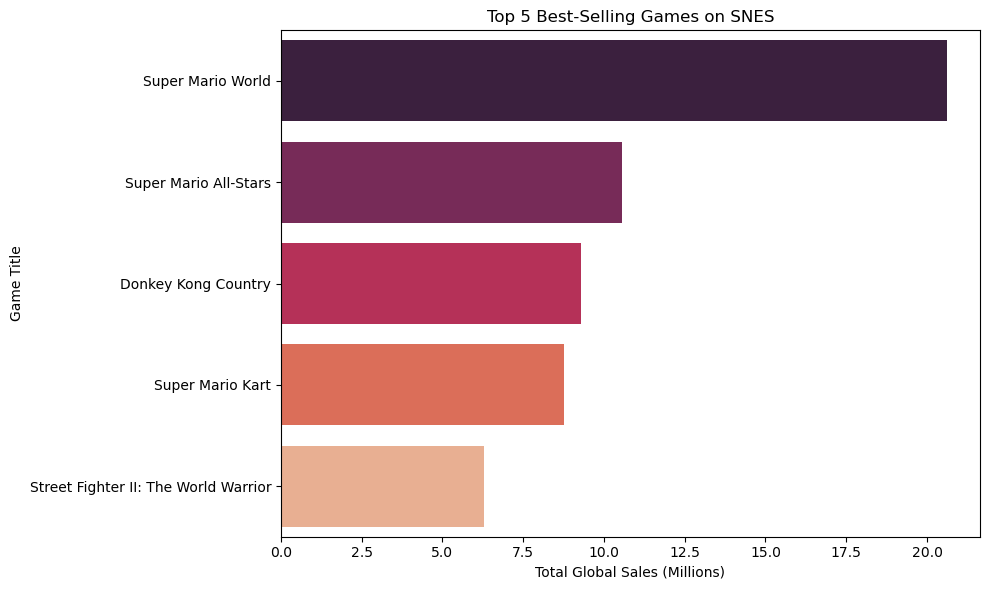

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


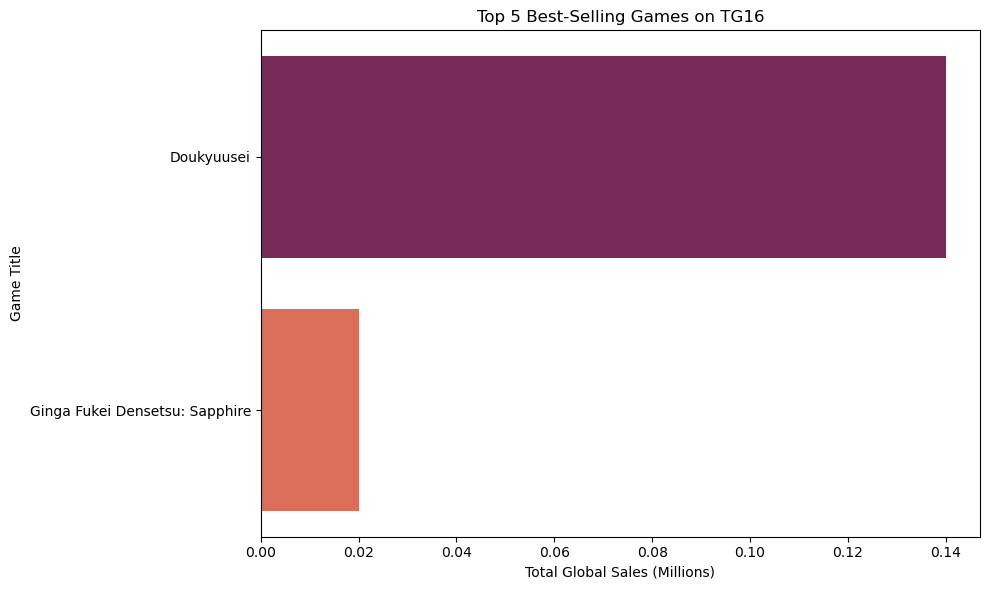

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


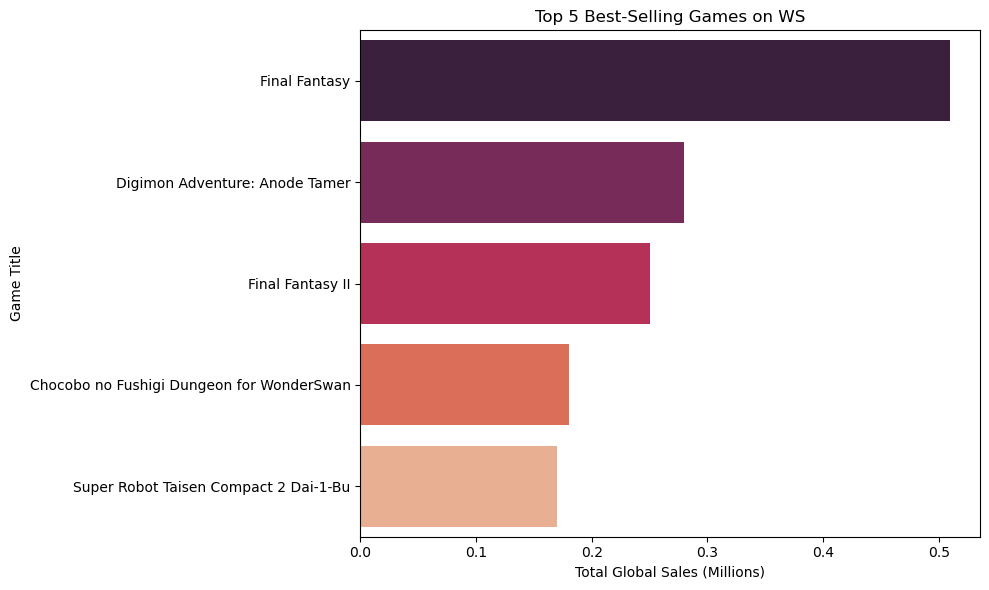

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


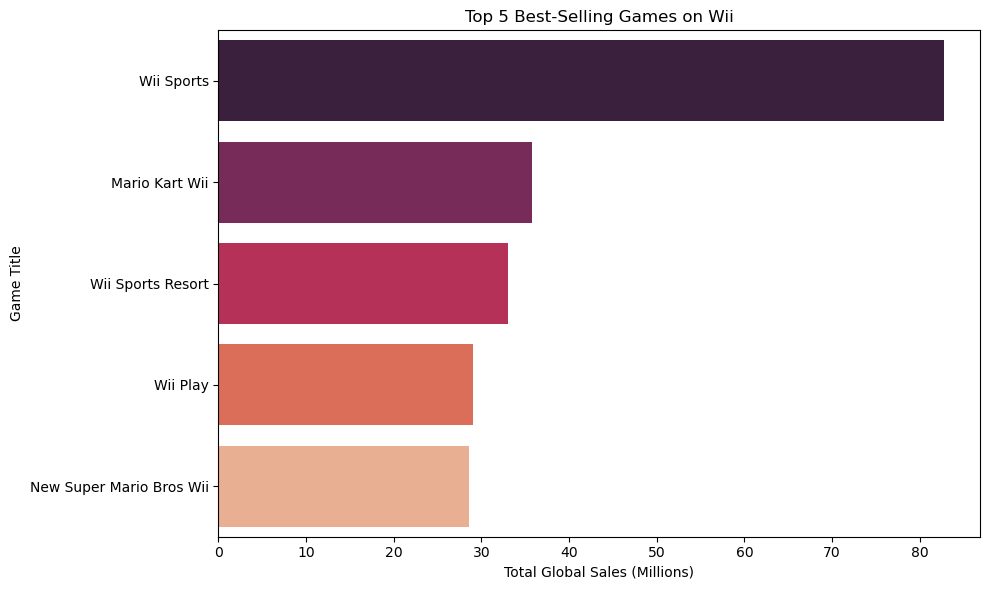

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


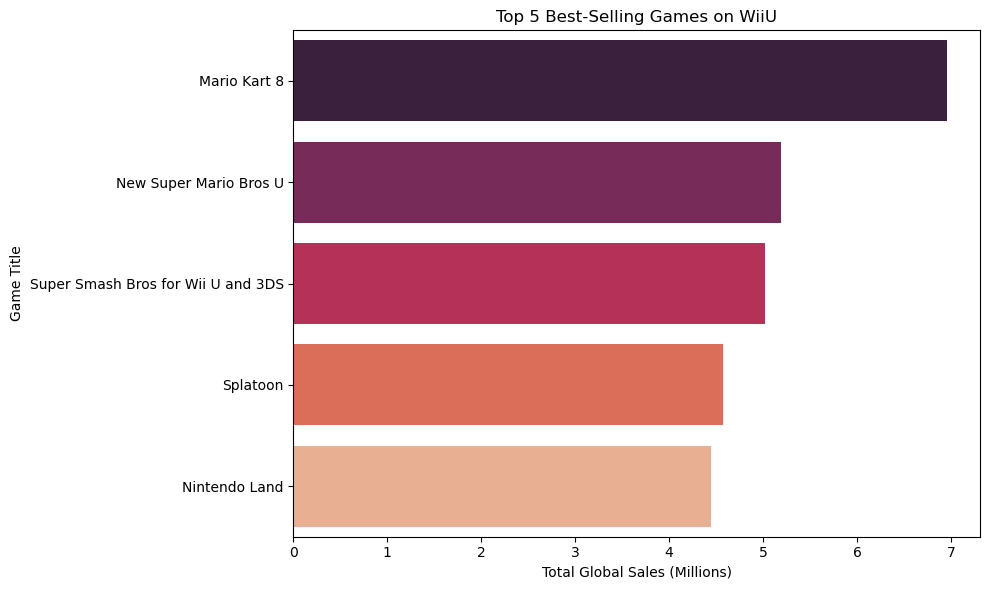

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


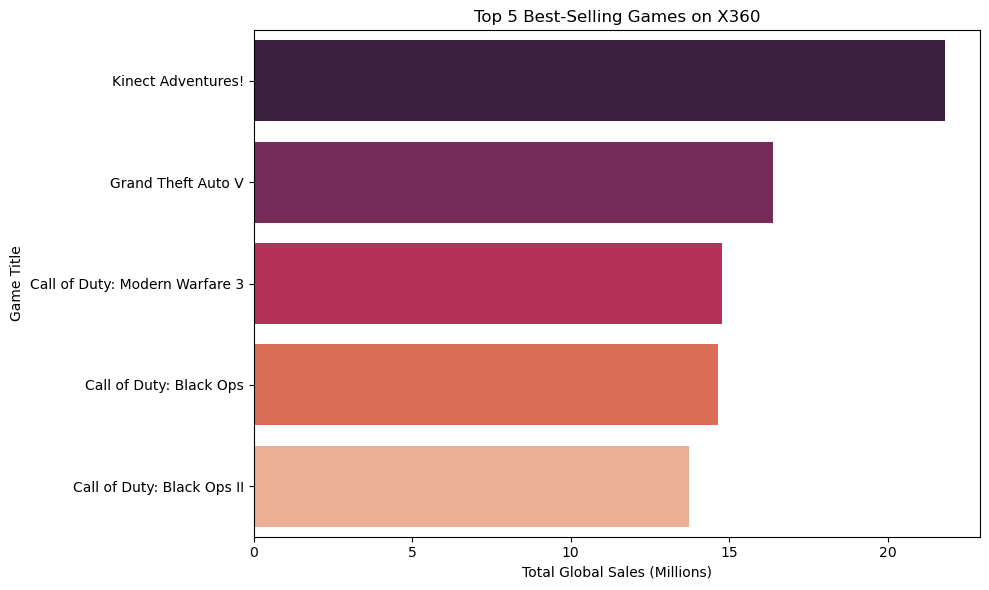

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


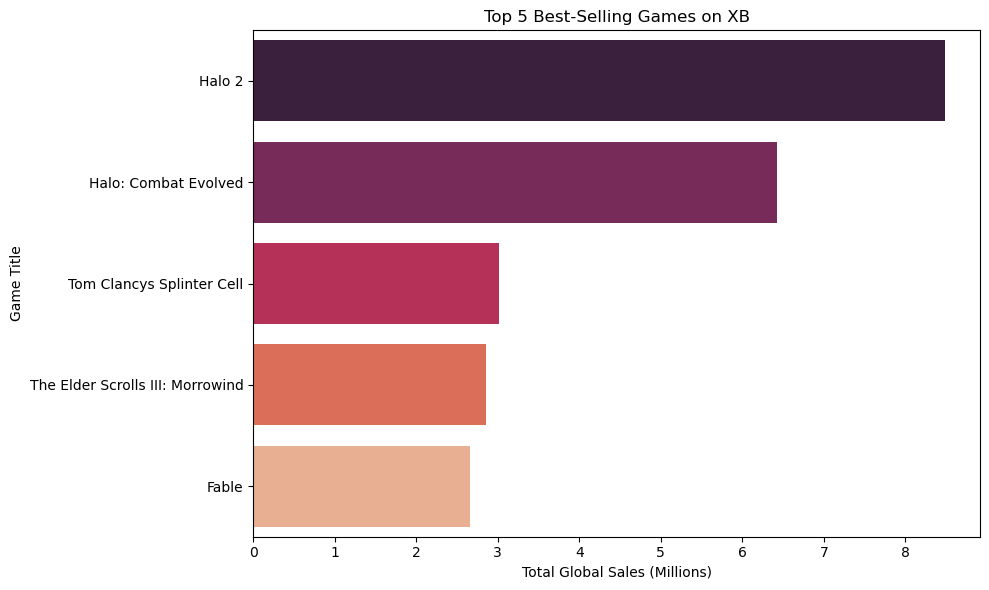

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/1616322467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')


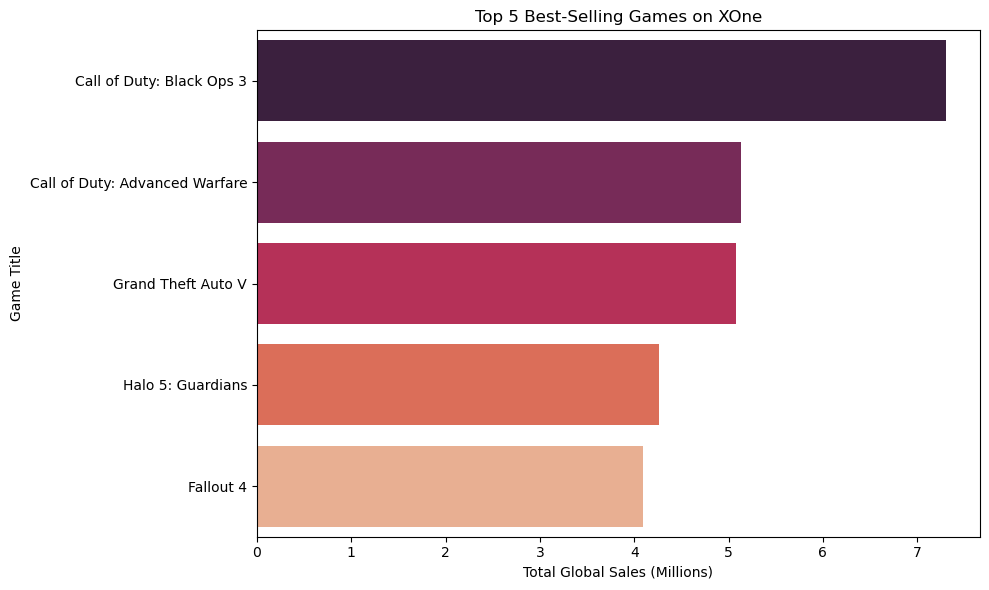

In [136]:
# 20. What are the top 5 best-selling games per platform?

platform_game_sales = df2.groupby(['Platform', 'Name'])['Global_Sales'].sum().reset_index()
def get_top_n_games(group, n=5):
    return group.sort_values(by='Global_Sales', ascending=False).head(n)
top_5_games_per_platform = platform_game_sales.groupby('Platform').apply(get_top_n_games).reset_index(drop=True)
# Display the top 5 best-selling games per platform
platforms = top_5_games_per_platform['Platform'].unique()
for platform in platforms:
    platform_data = top_5_games_per_platform[top_5_games_per_platform['Platform'] == platform]
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Global_Sales', y='Name', data=platform_data, palette='rocket')
    plt.title(f'Top 5 Best-Selling Games on {platform}')
    plt.xlabel('Total Global Sales (Millions)')
    plt.ylabel('Game Title')
    plt.tight_layout()
    plt.show()

Sales + Engagement + Ratings

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/4126916567.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_global_sales.head(10).values, y=genre_global_sales.head(10).index, palette='tab10')


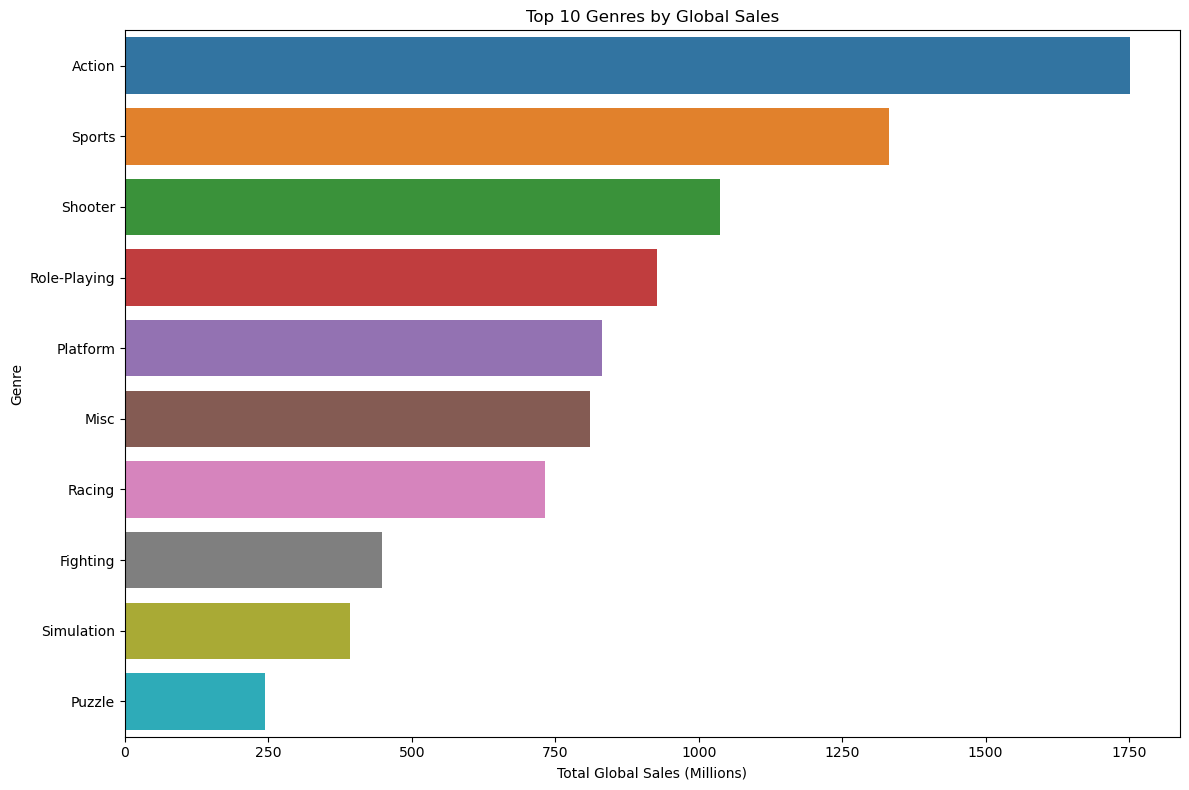

In [137]:
# 21.Which game genres generate the most global sales?

genre_global_sales = df2.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Create a bar chart of the top genres by global sales
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_global_sales.head(10).values, y=genre_global_sales.head(10).index, palette='tab10')
plt.title('Top 10 Genres by Global Sales')
plt.xlabel('Total Global Sales (Millions)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

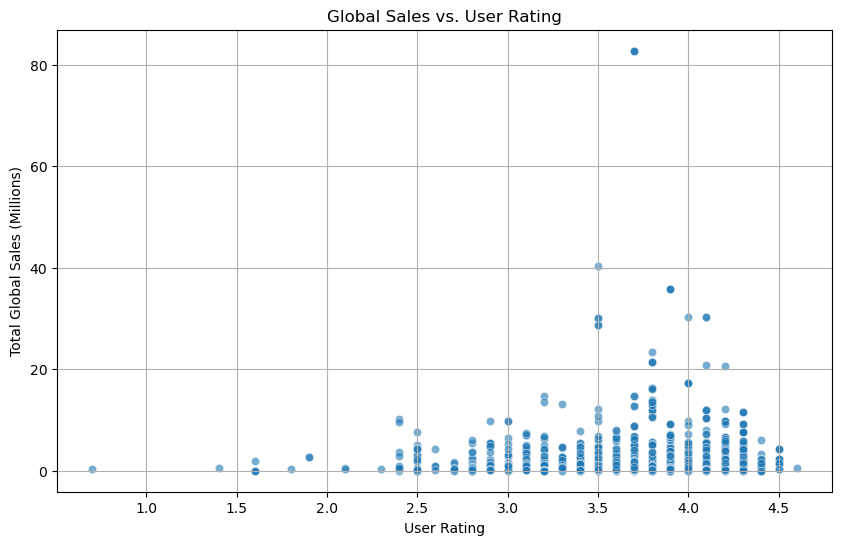

In [138]:
# 22. How does user rating affect global sales?

merged_df = pd.merge(df1, df2, left_on='Title', right_on='Name', how='inner')
# Create a scatter plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Rating', y='Global_Sales', alpha=0.6)
plt.title('Global Sales vs. User Rating')
plt.xlabel('User Rating')
plt.ylabel('Total Global Sales (Millions)')
plt.grid(True)
plt.show()

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/3249100569.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


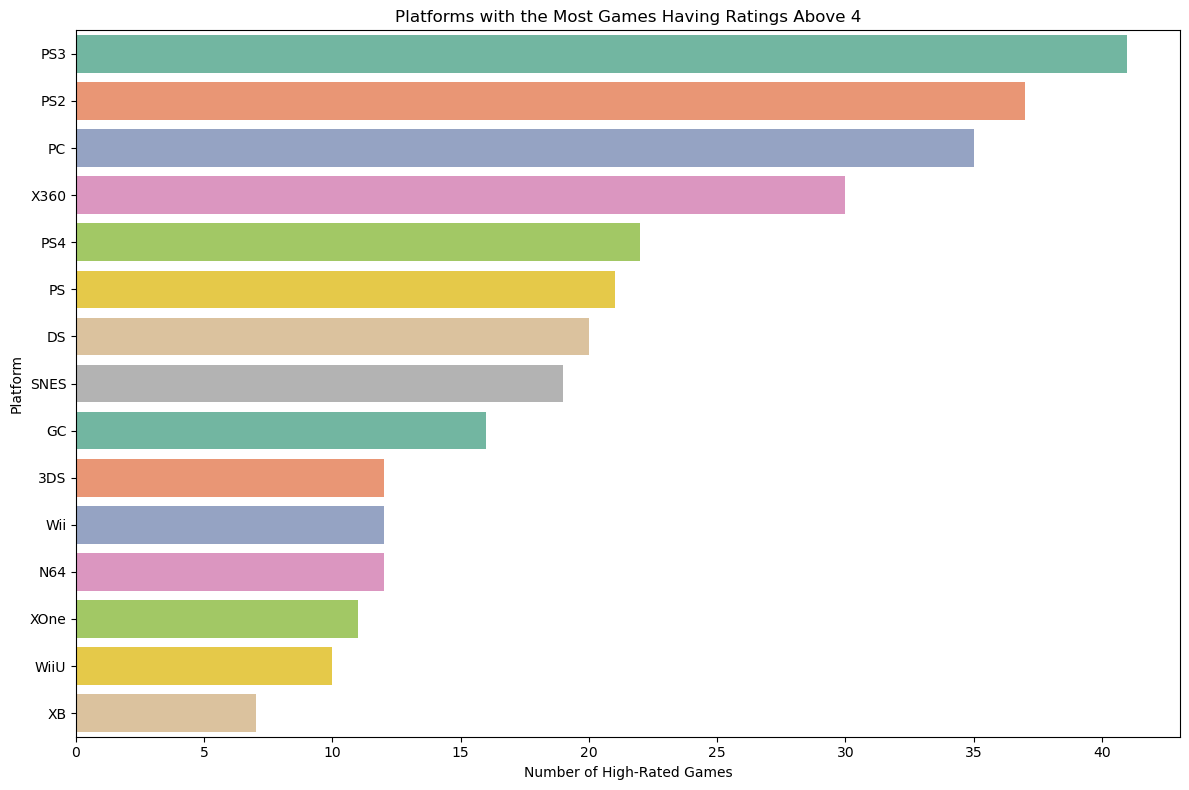

In [139]:
# 23.Which platforms have the most games with high ratings (e.g., above 4)?

merged_df_ratings = pd.merge(df1, df2, left_on='Title', right_on='Name', how='inner')
high_rated_games = merged_df_ratings[merged_df_ratings['Rating'] > 4]
platform_high_ratings_count = high_rated_games['Platform'].value_counts().reset_index()
platform_high_ratings_count.columns = ['Platform', 'Number of High-Rated Games']

# Sort by the number of high-rated games
platform_high_ratings_count = platform_high_ratings_count.sort_values(by='Number of High-Rated Games', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    data=platform_high_ratings_count.head(15), # Display top N platforms
    x='Number of High-Rated Games',
    y='Platform',
    palette='Set2'
)
plt.title('Platforms with the Most Games Having Ratings Above 4')
plt.xlabel('Number of High-Rated Games')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

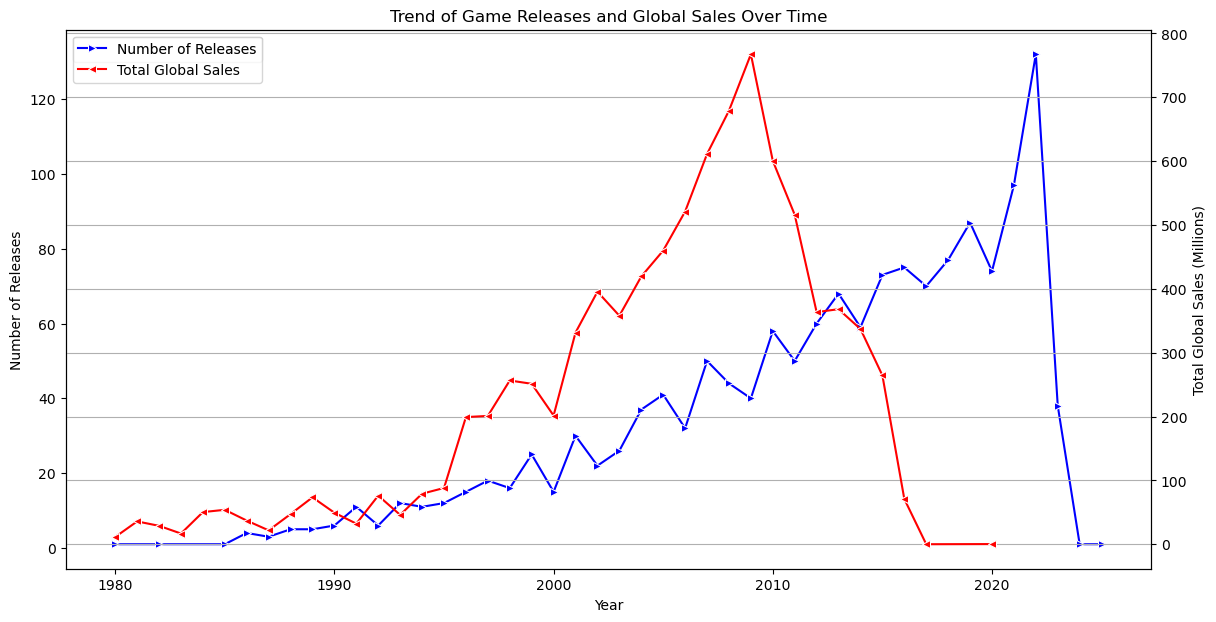

In [140]:
# 24. What’s the trend of releases and sales over time?




releases_by_year_df1 = df1['Release_Year'].value_counts().sort_index().reset_index()
releases_by_year_df1.columns = ['Year', 'Number_of_Releases']

sales_by_year_df2 = df2.groupby('Year')['Global_Sales'].sum().reset_index()
sales_by_year_df2.columns = ['Year', 'Total_Global_Sales']
releases_sales_by_year = pd.merge(releases_by_year_df1, sales_by_year_df2, on='Year', how='outer')
releases_sales_by_year = releases_sales_by_year.sort_values(by='Year')
# Create a line chart for the trend of releases and sales over time
plt.figure(figsize=(14, 7))
ax1 = sns.lineplot(x=releases_sales_by_year['Year'], y=releases_sales_by_year['Number_of_Releases'], label='Number of Releases', marker='>', color='blue')
ax2 = plt.twinx()
sns.lineplot(x=releases_sales_by_year['Year'], y=releases_sales_by_year['Total_Global_Sales'], ax=ax2, color='red', label='Total Global Sales', marker='<')
# Title and labels
plt.title('Trend of Game Releases and Global Sales Over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Releases') # Label for the first y-axis
ax2.set_ylabel('Total Global Sales (Millions)') # Set label for the second y-axis
lines, labels = ax1.get_legend_handles_labels()# Combine legends from both axes
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.grid(True)
plt.show()

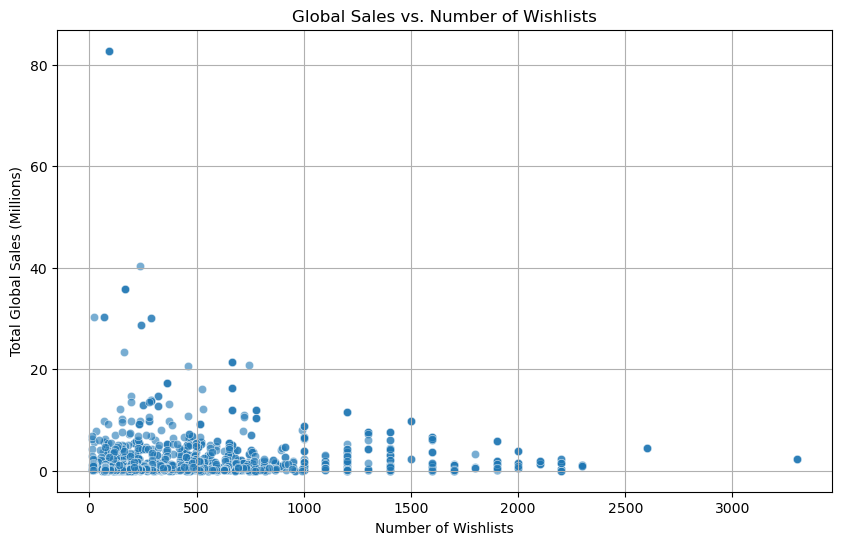

In [141]:
# 25.  Do highly wishlisted games lead to more sales?


df1['Wishlist'] = pd.to_numeric(df1['Wishlist'], errors='coerce')
wishlist_sales_df = pd.merge(df1[['Title', 'Wishlist']], df2[['Name', 'Global_Sales']], left_on='Title', right_on='Name', how='inner')
wishlist_sales_df['Wishlist'] = pd.to_numeric(wishlist_sales_df['Wishlist'], errors='coerce')
wishlist_sales_df['Global_Sales'] = pd.to_numeric(wishlist_sales_df['Global_Sales'], errors='coerce')
wishlist_sales_df.dropna(subset=['Wishlist', 'Global_Sales'], inplace=True)
# Create a scatter plot to visualize the relationship between Wishlist and Global Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wishlist_sales_df, x='Wishlist', y='Global_Sales', alpha=0.6)
plt.title('Global Sales vs. Number of Wishlists')
plt.xlabel('Number of Wishlists')
plt.ylabel('Total Global Sales (Millions)')
plt.grid(True)
plt.show()

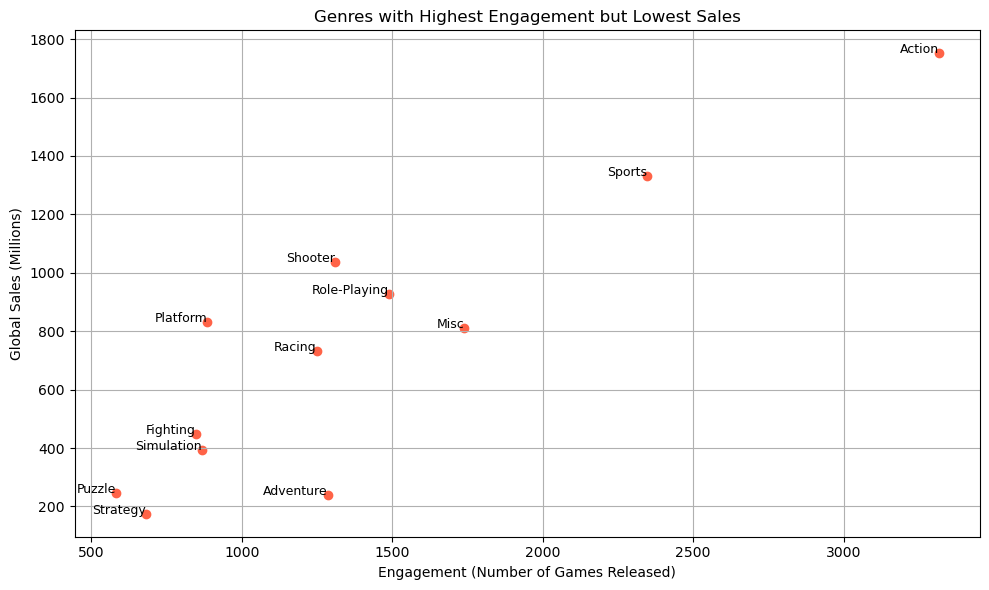

In [142]:
#26.Which genres have the highest engagement but lowest sales?

genre_engagement = df2.groupby('Genre').size()
genre_sales = df2.groupby('Genre')['Global_Sales'].sum()
genre_stats = pd.DataFrame({
    'Engagement': genre_engagement,
    'Global_Sales': genre_sales
})

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(genre_stats['Engagement'], genre_stats['Global_Sales'], color='tomato')

# Add labels for each genre
for genre, row in genre_stats.iterrows():
    plt.text(row['Engagement'], row['Global_Sales'], genre, fontsize=9, ha='right')

# Axis labels and title
plt.xlabel('Engagement (Number of Games Released)')
plt.ylabel('Global Sales (Millions)')
plt.title('Genres with Highest Engagement but Lowest Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

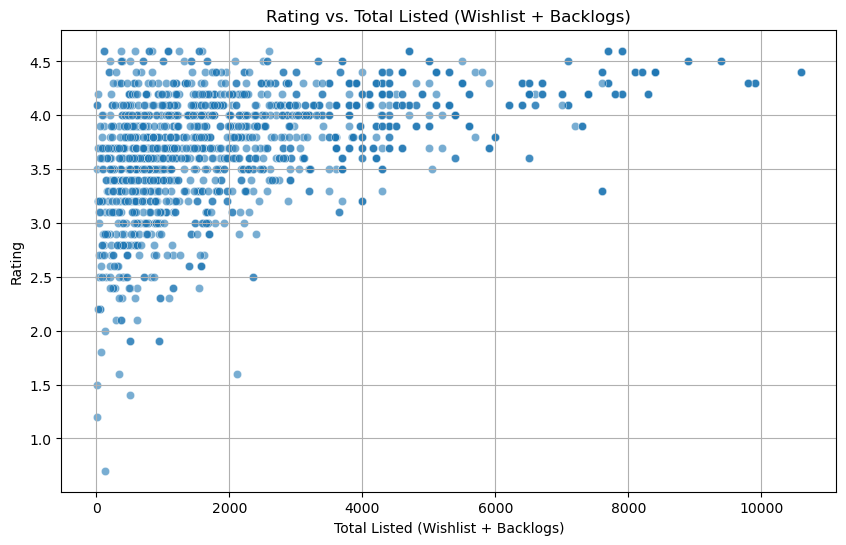

In [143]:
# 27 . Do highly listed games (wishlist/backlogs) correlate with better ratings?
df1['Total_Listed'] = df1['Wishlist'] + df1['Backlogs']

# Create a scatter plot to visualize the relationship between Total_Listed and Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='Total_Listed', y='Rating', alpha=0.6 )
plt.title('Rating vs. Total Listed (Wishlist + Backlogs)')
plt.xlabel('Total Listed (Wishlist + Backlogs)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

/var/folders/rf/s4hs36n10wq7_j4gxt9wkg9w0000gn/T/ipykernel_68924/2782776537.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned_engagement['Genres'] = df1_cleaned_engagement['Genres'].astype(str)


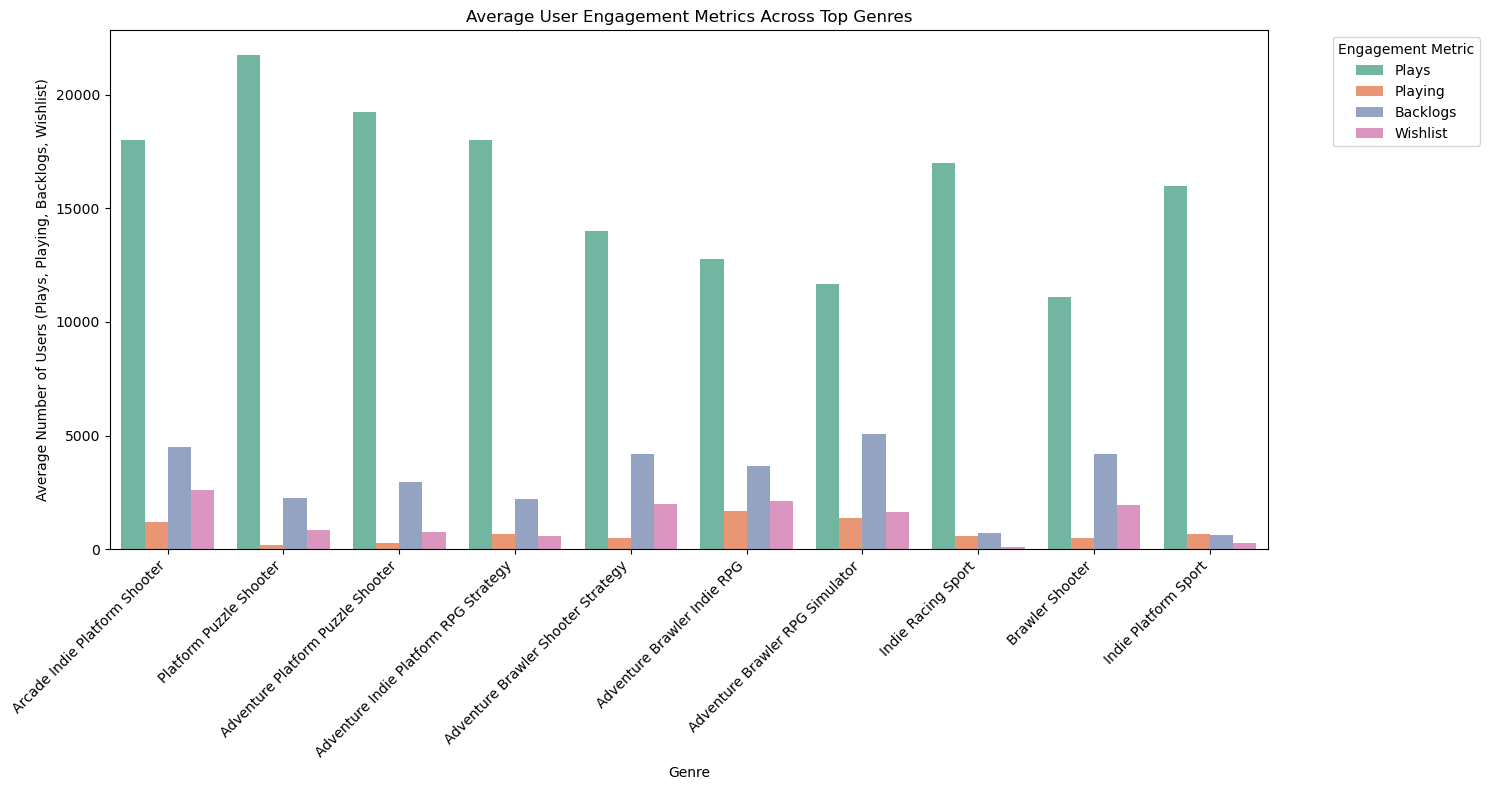

In [144]:
# 28.How does user engagement differ across genres?

df1['Plays'] = pd.to_numeric(df1['Plays'], errors='coerce')
df1['Playing'] = pd.to_numeric(df1['Playing'], errors='coerce')
df1['Backlogs'] = pd.to_numeric(df1['Backlogs'], errors='coerce')
df1['Wishlist'] = pd.to_numeric(df1['Wishlist'], errors='coerce')

df1_cleaned_engagement = df1.dropna(subset=['Plays', 'Playing', 'Backlogs', 'Wishlist', 'Genres'])
df1_cleaned_engagement['Genres'] = df1_cleaned_engagement['Genres'].astype(str)
genres = df1_cleaned_engagement['Genres'].str.replace('[', '').str.replace(']', '').str.split(', ')
df1_exploded_genres = df1_cleaned_engagement.copy()
df1_exploded_genres['Genres'] = genres
df1_exploded_genres = df1_exploded_genres.explode('Genres').dropna(subset=['Genres']) # Drop rows where genre is NaN after explode

# Calculate average engagement metrics per genre
genre_engagement = df1_exploded_genres.groupby('Genres')[['Plays', 'Playing', 'Backlogs', 'Wishlist']].mean().reset_index()
genre_engagement['Total_Engagement'] = genre_engagement[['Plays', 'Playing', 'Backlogs', 'Wishlist']].sum(axis=1)
top_genres_by_engagement = genre_engagement.sort_values(by='Total_Engagement', ascending=False).head(10) # Adjust head() as needed

# Melt the dataframe to prepare for plotting
genre_engagement_melted = top_genres_by_engagement.melt(
    id_vars='Genres',
    value_vars=['Plays', 'Playing', 'Backlogs', 'Wishlist'],
    var_name='Engagement_Metric',
    value_name='Average_Value'
)

# Create a grouped bar chart 
plt.figure(figsize=(15, 8))
sns.barplot(
    data=genre_engagement_melted,
    x='Genres',
    y='Average_Value',
    hue='Engagement_Metric',
    palette='Set2'
)
plt.title('Average User Engagement Metrics Across Top Genres')
plt.xlabel('Genre')
plt.ylabel('Average Number of Users (Plays, Playing, Backlogs, Wishlist)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Engagement Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

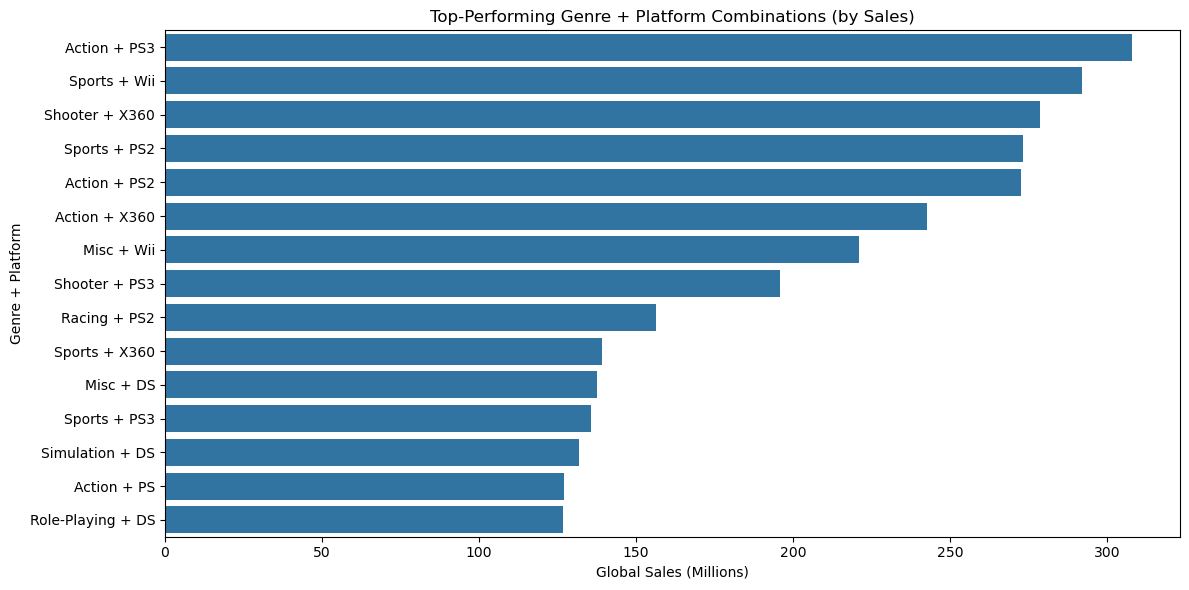

In [145]:
#29. What are the top-performing combinations of Genre + Platform?

genre_platform_sales = df2.groupby(['Genre', 'Platform'])['Global_Sales'].sum().reset_index()
genre_platform_sales_pivot = genre_platform_sales.pivot(index='Genre', columns='Platform', values='Global_Sales').fillna(0)
genre_total_sales = genre_platform_sales_pivot.sum(axis=1).sort_values(ascending=False)
top_genres = genre_total_sales[genre_total_sales > 50].index.tolist()  #
top_combinations = genre_platform_sales.sort_values(by='Global_Sales', ascending=False).head(15)
# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_combinations, x='Global_Sales', y=top_combinations['Genre'] + " + " + top_combinations['Platform'])
plt.title('Top-Performing Genre + Platform Combinations (by Sales)')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Genre + Platform')
plt.tight_layout()
plt.show()

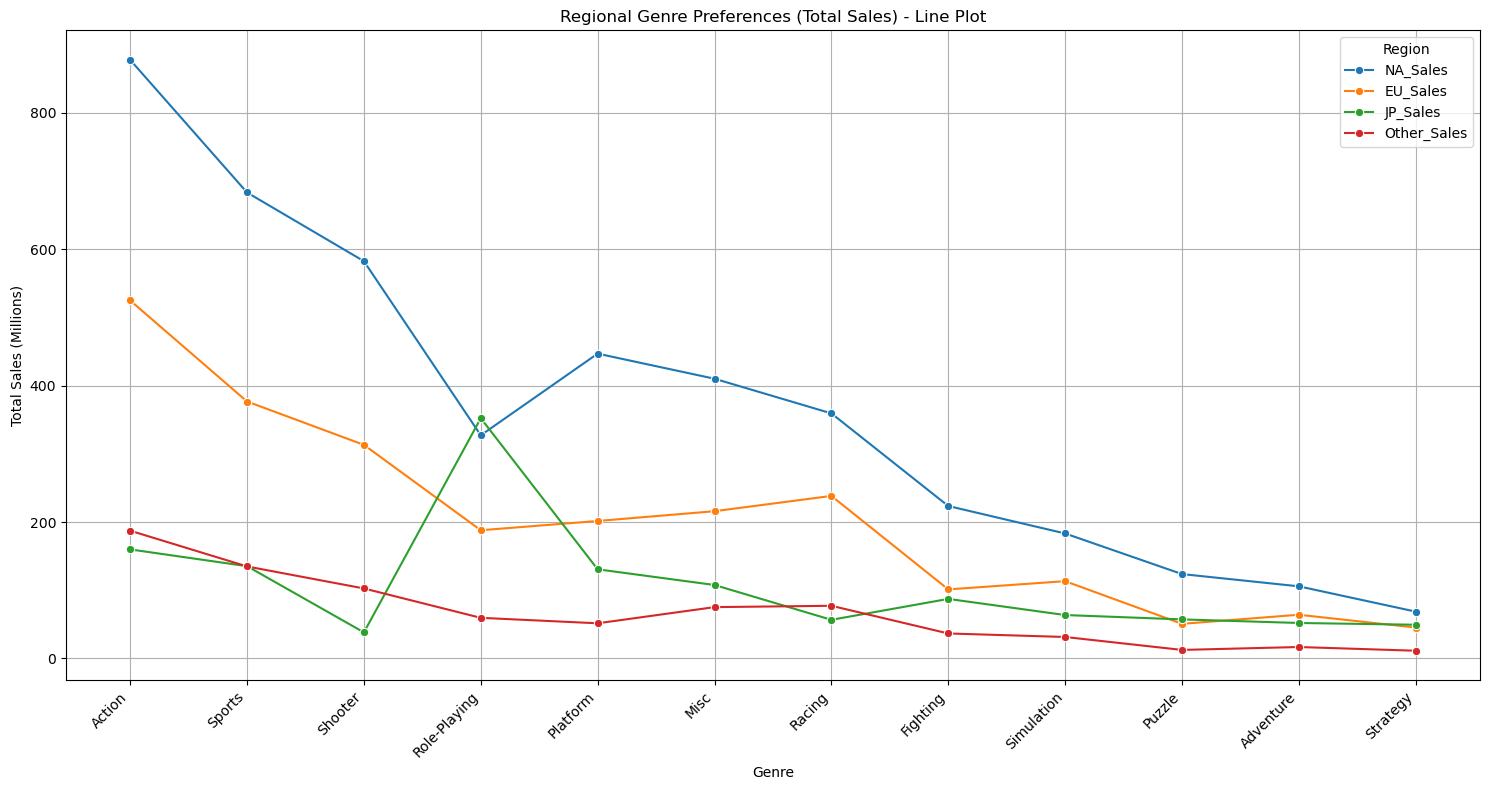

In [146]:
# 30.What does a regional sales heatmap by genre reveal?

regional_genre_sales = df2.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
regional_genre_sales['Total_Sales'] = regional_genre_sales.sum(axis=1)
# Let's filter for the top 20 genres by total sales
top_genres_by_sales = regional_genre_sales.sort_values(by='Total_Sales', ascending=False).head(20).index

regional_genre_sales_filtered = regional_genre_sales.loc[top_genres_by_sales]
regional_genre_sales_filtered = regional_genre_sales_filtered.drop(columns=['Total_Sales'])

# Melt the DataFrame to have a 'Region' column and a 'Sales' column
regional_genre_sales_melted = regional_genre_sales_filtered.reset_index().melt(
    id_vars='Genre',
    var_name='Region',
    value_name='Sales'
)

# Create a line plot to visualize regional sales for top genres
plt.figure(figsize=(15, 8))
sns.lineplot(
    data=regional_genre_sales_melted,
    x='Genre',
    y='Sales',
    hue='Region',
    marker='o' # Add markers to the lines
)
plt.title('Regional Genre Preferences (Total Sales) - Line Plot')
plt.xlabel('Genre')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()


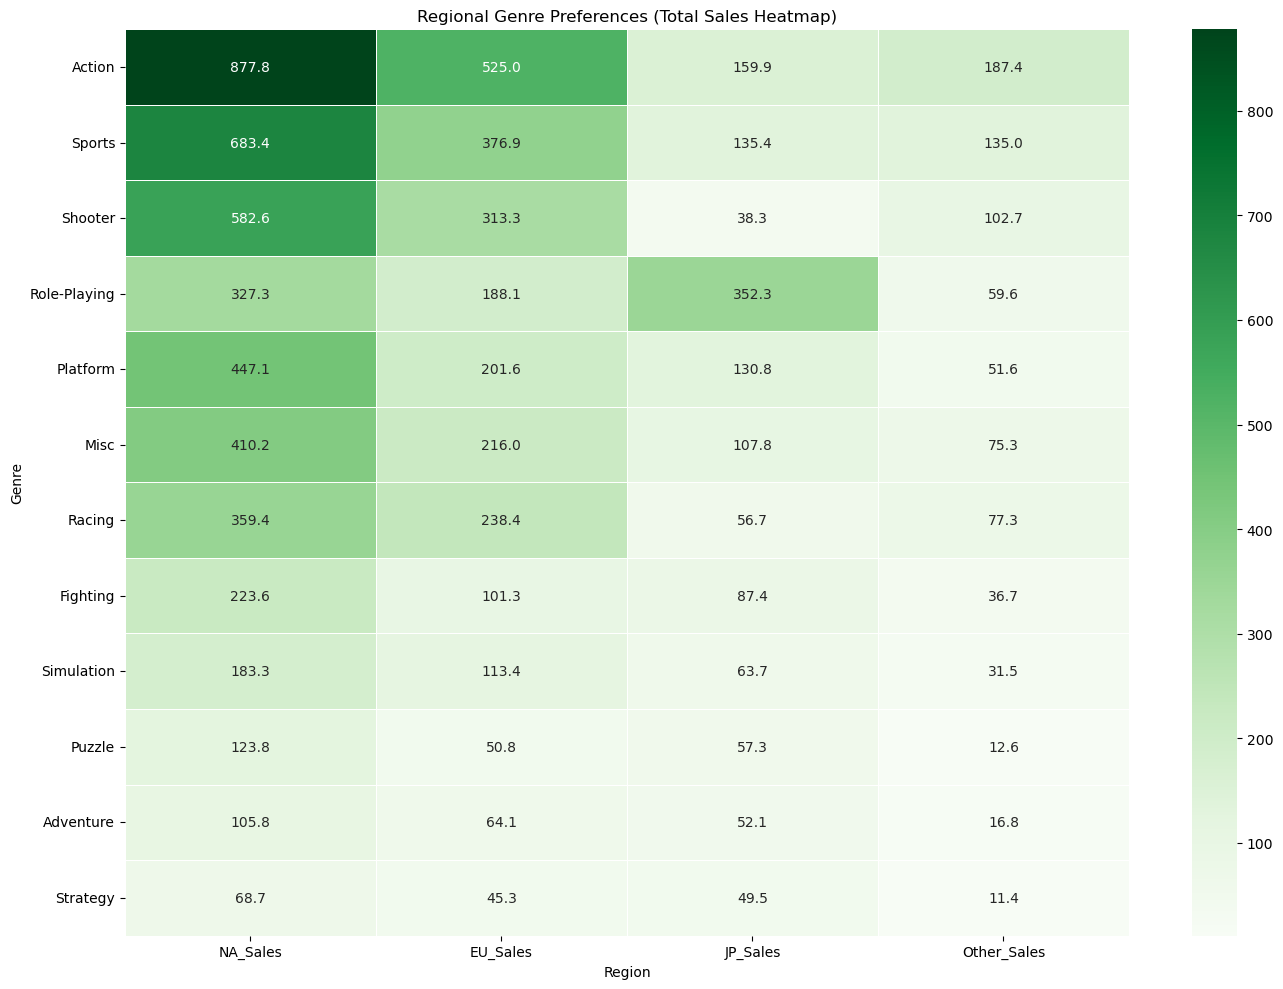

In [147]:


#regional_genre_sales = df2.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
regional_genre_sales['Total_Sales'] = regional_genre_sales.sum(axis=1)
top_genres_by_sales = regional_genre_sales.sort_values(by='Total_Sales', ascending=False).head(20).index
regional_genre_sales_filtered = regional_genre_sales.loc[top_genres_by_sales]
regional_genre_sales_filtered = regional_genre_sales_filtered.drop(columns=['Total_Sales'])
# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(regional_genre_sales_filtered, annot=True, fmt=".1f", cmap="Greens", linewidths=.5)
plt.title('Regional Genre Preferences (Total Sales Heatmap)')
plt.xlabel('Region')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()